# Scientific Computing 


# Coursework 1 

## Introduction and Aim 

This report aims to provide assessment of environmental variables, including discharge,temperature and the data of snow cover at the Del Norte monitoring station of Colorado, USA. 

Data was adopted from http://climate.colostate.edu (temperature) and http://waterdata.usgs.gov (discharge). Some basic geographical data on the station is given below:

Station Name: DEL NORTE 2E
Latitude: -106.30833 
Longitude: 37.69083
Elevation: 7845 ft.

More broadly an assessment of the HUC catchment 13010001 Rio Grande headwaters (Colorado, USA) will be undertaken to understand snow cover in the region.

The purpose of this report is the preparation of data collected at the Del Norte site for future hydrological modelling. Hence, all the data file should be saved in the same fold.


Firstly, in the part of discharge and temperature, two years should be selected to do the data analysis, related values and figures should be found out, such as mean values,maximum and minimum values of each year. 

Secondly, in the part of data of snow cover, the related data and figures, MODIS snow cover data, masking, cropping and extracting the data into a 3D numpy array, storing the data, running the code for 2 years data, and appropiate plots.

Therefore, three kinds of data should be analysed appropriately. 


## 1. Discharge

### 1.1 Downloading the data

In [13]:
#import necessary moduels needed in the coding

import requests
import numpy as np
from io import StringIO
import io
from dateutil import parser
import matplotlib.pylab as plt
%matplotlib inline
import os

[['2001-01-01' '2001-01-02' '2001-01-03' ... '2017-12-29' '2017-12-30'
  '2017-12-31']
 ['160' '160' '160' ... '190' '200' '205']]


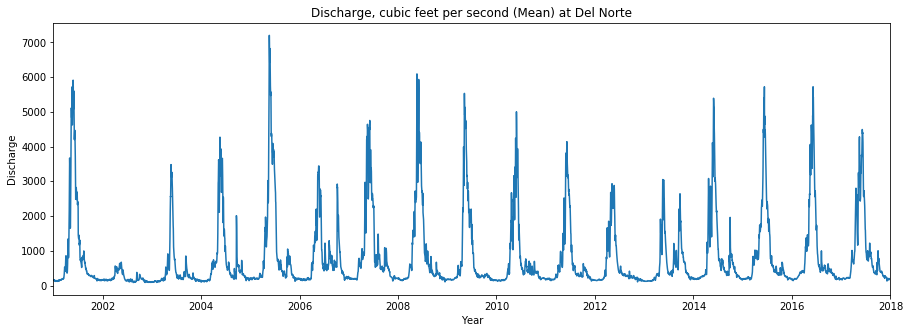

In [14]:
"""
This code after the model developed in
"Chapter 4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#print out all the data
url = 'https://waterservices.usgs.gov/nwis/dv/?sites=08220000&format=rdb&startDT=2001-01-01&parameterCd=00060'
data = np.loadtxt(StringIO(requests.get(url).text),skiprows=30,\
           usecols=(2,3),unpack=True,dtype=str)

print(data)

date = [parser.parse(d) for d in data[0]]
flow = data[1].astype(float)

## Plotting a figure for all years of discharge 

plt.figure(figsize=(15,5))
plt.plot(date,flow)
plt.xlabel("Year")
plt.ylabel("Discharge")
plt.xlim(date[0],date[-1])
plt.title('Discharge, cubic feet per second (Mean) at Del Norte')
plt.savefig('discharge.jpg')

According to this figure, 2016 and 2017 have been choosen to do the analysis for the reason that this two years are with appropriate discharge throuhout the whole year.

In [15]:
"""
This code after the model developed in
"Chapter 1"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#get the text
txt = requests.get(url).text

# copy the useful data
start = txt.find('2015-12-31')
stop  = txt.find('\n\n2018-01-01')
data_table = txt[start:stop]

# split into a list of strings
data_lines = data_table.splitlines()

# tell me something useful
print(type(data_lines),len(data_lines))

# loop over some examples
for i in 0,1,len(data_lines)-1:
    print('line {} {}\n\t{}'.format(i,type(data_lines[i]),data_lines[i]))
    
print(data_table)

<class 'list'> 732
line 0 <class 'str'>
	2015-12-31	165	A:e
line 1 <class 'str'>
	USGS	08220000	2016-01-01	165	A:e
line 731 <class 'str'>
	USGS	08220000	2017-12-31	205	A:e
2015-12-31	165	A:e
USGS	08220000	2016-01-01	165	A:e
USGS	08220000	2016-01-02	170	A:e
USGS	08220000	2016-01-03	180	A:e
USGS	08220000	2016-01-04	190	A:e
USGS	08220000	2016-01-05	185	A:e
USGS	08220000	2016-01-06	180	A:e
USGS	08220000	2016-01-07	170	A:e
USGS	08220000	2016-01-08	165	A:e
USGS	08220000	2016-01-09	150	A:e
USGS	08220000	2016-01-10	140	A:e
USGS	08220000	2016-01-11	145	A:e
USGS	08220000	2016-01-12	150	A:e
USGS	08220000	2016-01-13	160	A:e
USGS	08220000	2016-01-14	170	A:e
USGS	08220000	2016-01-15	175	A:e
USGS	08220000	2016-01-16	180	A:e
USGS	08220000	2016-01-17	180	A:e
USGS	08220000	2016-01-18	180	A:e
USGS	08220000	2016-01-19	180	A:e
USGS	08220000	2016-01-20	195	A:e
USGS	08220000	2016-01-21	200	A:e
USGS	08220000	2016-01-22	195	A:e
USGS	08220000	2016-01-23	195	A:e
USGS	08220000	2016-01-24	200	A:e
USGS	08220000	201

In [16]:
#seperate the date and discharge into three different array

date = np.loadtxt(StringIO(requests.get(url).text),skiprows=30,\
           usecols=(2),unpack=True,dtype=str)
discharge = np.loadtxt(StringIO(requests.get(url).text),skiprows=30,\
           usecols=(3),unpack=True,dtype=str)
date_dis=np.loadtxt(StringIO(requests.get(url).text),skiprows=30,\
           usecols=(2,3),unpack=True,dtype=str)

print(date)
print(discharge)
print(date_dis)


['2001-01-01' '2001-01-02' '2001-01-03' ... '2017-12-29' '2017-12-30'
 '2017-12-31']
['160' '160' '160' ... '190' '200' '205']
[['2001-01-01' '2001-01-02' '2001-01-03' ... '2017-12-29' '2017-12-30'
  '2017-12-31']
 ['160' '160' '160' ... '190' '200' '205']]


In [17]:
#separate the date

# copy the useful data
start = txt.find('2016-01-01')-14
stop  = txt.find('\n\n2017-12-31')

# select a data column
data_column = 2

date = np.loadtxt(io.StringIO(txt[start:stop]),unpack=True,dtype=str,usecols=[data_column])

print(date)

['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-05'
 '2016-01-06' '2016-01-07' '2016-01-08' '2016-01-09' '2016-01-10'
 '2016-01-11' '2016-01-12' '2016-01-13' '2016-01-14' '2016-01-15'
 '2016-01-16' '2016-01-17' '2016-01-18' '2016-01-19' '2016-01-20'
 '2016-01-21' '2016-01-22' '2016-01-23' '2016-01-24' '2016-01-25'
 '2016-01-26' '2016-01-27' '2016-01-28' '2016-01-29' '2016-01-30'
 '2016-01-31' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-06' '2016-02-07' '2016-02-08' '2016-02-09'
 '2016-02-10' '2016-02-11' '2016-02-12' '2016-02-13' '2016-02-14'
 '2016-02-15' '2016-02-16' '2016-02-17' '2016-02-18' '2016-02-19'
 '2016-02-20' '2016-02-21' '2016-02-22' '2016-02-23' '2016-02-24'
 '2016-02-25' '2016-02-26' '2016-02-27' '2016-02-28' '2016-02-29'
 '2016-03-01' '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05'
 '2016-03-06' '2016-03-07' '2016-03-08' '2016-03-09' '2016-03-10'
 '2016-03-11' '2016-03-12' '2016-03-13' '2016-03-14' '2016-03-15'
 '2016-03-

In [18]:
# spliting the discharge data with the data of years

# copy the useful data
start = txt.find('2016-01-01')
stop  = txt.find('\n\n2017-12-31')

# select a data column
data_column = -2

discharge = np.loadtxt(io.StringIO(txt[start:stop]),unpack=True,dtype=str,usecols=[data_column])

print(discharge)

['165' '170' '180' '190' '185' '180' '170' '165' '150' '140' '145' '150'
 '160' '170' '175' '180' '180' '180' '180' '195' '200' '195' '195' '200'
 '200' '195' '190' '190' '190' '195' '200' '200' '195' '190' '185' '190'
 '200' '200' '210' '215' '220' '225' '235' '240' '240' '245' '245' '255'
 '265' '280' '285' '290' '295' '295' '295' '305' '325' '340' '350' '360'
 '370' '380' '390' '385' '375' '375' '365' '355' '350' '350' '375' '390'
 '405' '420' '405' '390' '380' '390' '395' '395' '410' '430' '420' '410'
 '415' '405' '385' '395' '415' '410' '405' '360' '395' '480' '541' '601'
 '643' '745' '861' '879' '1040' '1120' '1070' '1070' '1230' '1370' '1360'
 '1230' '1120' '1010' '983' '1020' '1090' '1240' '1350' '1460' '1450'
 '1320' '1300' '1290' '1230' '1180' '1140' '1170' '1240' '1520' '2040'
 '2470' '2430' '2270' '2310' '2640' '2610' '2650' '3100' '3750' '4060'
 '3570' '3270' '3180' '3210' '3590' '4270' '4410' '4620' '4500' '4410'
 '3990' '3580' '3370' '3490' '3630' '4040' '4300' '4890' '4

### 1.2 Summary of data

[['2015-12-31' '2016-01-01' '2016-01-02' ... '2017-12-29' '2017-12-30'
  '2017-12-31']
 ['165' '165' '170' ... '190' '200' '205']]


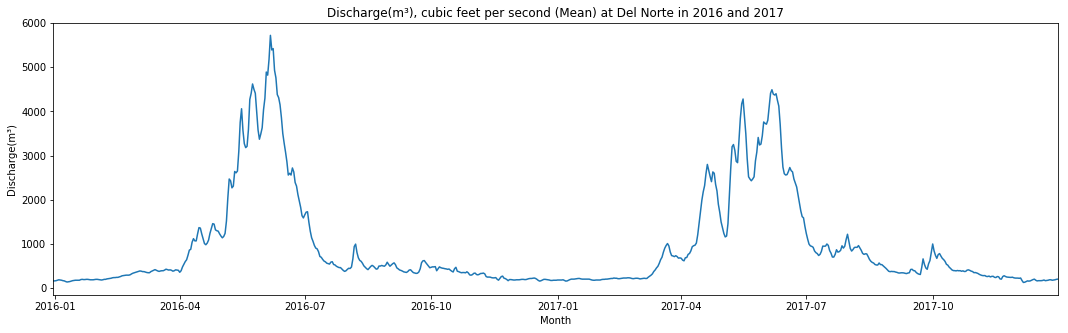

In [19]:
"""
This code after the model developed in
"Chapter 1"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#ploting a figure to show the data of from 2016-2017
#spliting the data from 2016-01-01 to 2017-13-31

start = txt.find('2015-12-31')-14
stop  = txt.find('\n\n2018-01-01')
data_column=2,-2
data = np.loadtxt(io.StringIO(txt[start:stop]),skiprows=0,\
                  usecols=data_column,unpack=True,dtype=str)

print(data)

date = [parser.parse(d) for d in data[0]]
flow = data[1].astype(float)
plt.figure(figsize=(18,5))
plt.plot(date,flow)
plt.xlim(date[0],date[-1])
plt.title('Discharge(m³), cubic feet per second (Mean) at Del Norte in 2016 and 2017')
plt.xlabel("Month")
plt.ylabel("Discharge(m³)")
plt.savefig('data/discharge(2016-2017).jpg')

936.4924760601915 130.0 5720.0
953.517808219178 130.0 4490.0


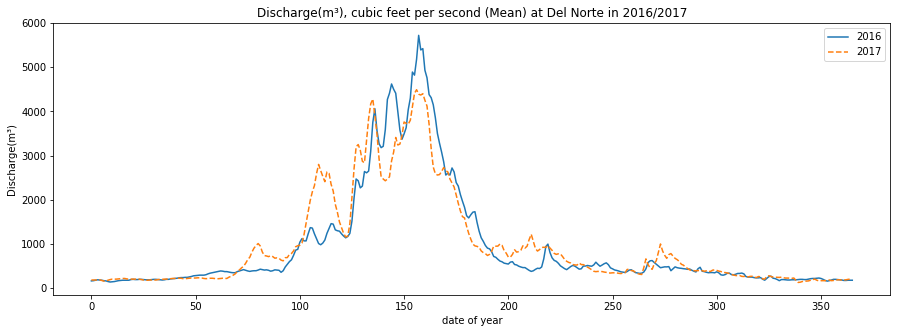

In [20]:
"""
This code after the model developed in
"Chapter 1"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#ploting a diagram to show the data of in 2016/2017 respectively

start = txt.find('2016-01-01')
stop  = txt.find('\n\n2016-12-31')
data1 = np.loadtxt(io.StringIO(txt[start:stop]),skiprows=0,\
                  usecols=(2,-2),unpack=True,dtype=str)

start = txt.find('2017-01-01')
stop  = txt.find('\n\n2017-12-31')
data2 = np.loadtxt(io.StringIO(txt[start:stop]),skiprows=0,\
                  usecols=(2,-2),unpack=True,dtype=str)

#after finish the selection, to calculate the mean, minimum and maximum of the discharge in the two years choosen 

flow1 = data1[1].astype(float)

mean1=flow1.mean()
mini1=flow1.min()
maxi1=flow1.max()

flow2 = data2[1].astype(float)
mean2=flow2.mean()
mini2=flow2.min()
maxi2=flow2.max()

#printing out the of data

print(mean1,mini1,maxi1)
print(mean2,mini2,maxi2)


#pd.options.display.float_format='{:,.2f}'.format

#to plot the figure

date = [parser.parse(d) for d in data[0]]
flow = data[1].astype(float)
plt.figure(figsize=(15,5))

doy=np.arange(0,366) 

#plt.plot(date,flow)
#plot the two years data respectively 


plt.plot(doy[:366],data1[1][:366].astype(float), '-', label="2016")
plt.plot(doy[:365],data2[1][:365].astype(float), '--', label="2017")
plt.xlabel("date of year")
plt.ylabel("Discharge(m³)")
plt.title('Discharge(m³), cubic feet per second (Mean) at Del Norte in 2016/2017')
plt.legend(loc='best')
plt.savefig('data/discharge(2016 and 2017).jpg')



#pd.options.display.float_format = '{:}'.format



The mean discharge value is 936.4924760601915
The maximum discharge value is 5720.0
The mean discharge value is 130.0


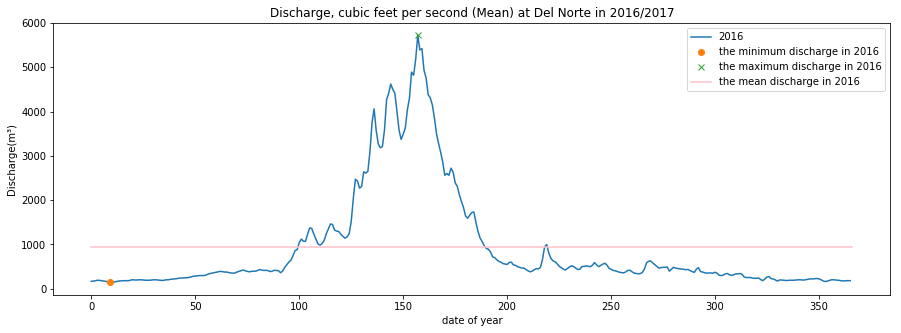

In [21]:
"""
This code after the model developed in
"Chapter 2"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#ploting the figure of 2016
#it shows the statistics of mean, maximum and maximum values of discharge directly

discharge1 = data1[1][:366].astype(np.float)

plt.figure(figsize=(15,5))
plt.plot(doy[:366],data1[1][:366].astype(float), '-', label="2016")

#x_axis=doy[:366]

plt.plot(np.argmin(discharge1), np.min(discharge1),'o', label="the minimum discharge in 2016")
plt.plot(np.argmax(discharge1), np.max(discharge1),'x',label="the maximum discharge in 2016")
plt.plot([0,366],[mean1, mean1],label="the mean discharge in 2016",color='pink')
# plt.plot([x_axis[0],x_axis[-1]],[mean1[0], mean1[0]],label="the mean discharge in 2016",color='pink')
plt.xlabel("date of year")
plt.ylabel("Discharge(m³)")

plt.title('Discharge, cubic feet per second (Mean) at Del Norte in 2016/2017')
plt.legend(loc='best')

plt.savefig('data/discharge(2016).jpg')


flow1 = data1[1].astype(float)


print('The mean discharge value is',mean1)
print('The maximum discharge value is',maxi1)      
print('The mean discharge value is',mini1)

The mean discharge value is 953.517808219178
The maximum discharge value is 4490.0
The mean discharge value is 130.0


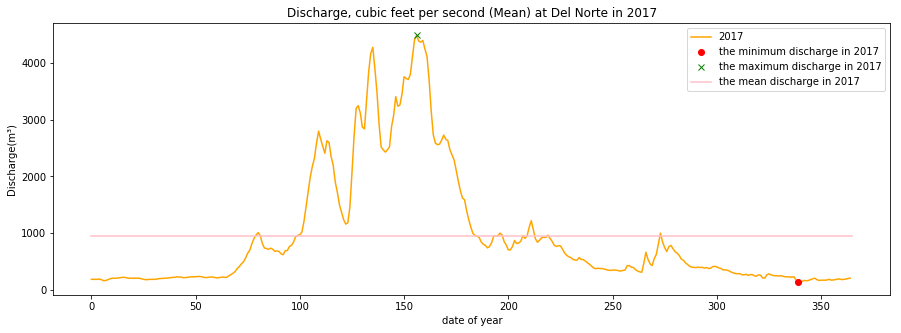

In [22]:
"""
This code after the model developed in
"Chapter 2"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#ploting the figure of 2017
#it shows the statistics of mean, maximum and maximum values of discharge directly

discharge2 = data2[1][:365].astype(np.float)

plt.figure(figsize=(15,5))
plt.plot(doy[:365],data2[1][:365].astype(float), '-', label="2017", color='orange')
plt.plot(np.argmin(discharge2),np.min(discharge2),'o',label="the minimum discharge in 2017",color="red")
plt.plot(np.argmax(discharge2),np.max(discharge2),'x',label="the maximum discharge in 2017",color='green')
plt.plot([0,365], [mean2, mean2],label="the mean discharge in 2017",color='pink')
plt.xlabel("date of year")
plt.ylabel("Discharge(m³)")

plt.title('Discharge, cubic feet per second (Mean) at Del Norte in 2017')
plt.legend(loc='best')

plt.savefig('data/discharge(2017).jpg')

print('The mean discharge value is',mean2)
print('The maximum discharge value is',maxi2)      
print('The mean discharge value is',mini2)

In [23]:
"""
This code after the model developed in
"numpy.savez_compressed"
by SciPy.org
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savez_compressed.html
My modifications have been to make the saving more efficient.
"""

# Saving the data.

discharge2016 = discharge1
discharge2017 = discharge2
filename2016 = "discharge2016.npz"
filename2017 = "discharge2017.npz"
np.savez_compressed(filename2016,discharge2016)
np.savez_compressed(filename2017,discharge2017)

In [93]:
a=mean1
b=maxi1
c=mini1
sdf1=pd.DataFrame([a,b,c],columns=['Data Summary of 2016'],index=['mean','max','min'])
print(sdf1)

print('---------------------------------')

d=mean2
e=maxi2
f=mini2
sdf=pd.DataFrame([d,e,f],columns=['Data Summary of 2017'],index=['mean','max','min'])
print(sdf)

      Data Summary of 2016
mean            936.492476
max            5720.000000
min             130.000000
---------------------------------
      Data Summary of 2017
mean            953.517808
max            4490.000000
min             130.000000


## 2.Temperature

### 2.1 Downloading the data

In [56]:
#import necessary moduels needed in the coding

import requests
import numpy as np
from io import StringIO
from dateutil import parser
import matplotlib.pylab as plt
%matplotlib inline
import sys
import os
from datetime import datetime, timedelta
from geog0111.geog_data import procure_dataset

In [57]:
#print data

tempfile='DATA/geog0111/data/delNorteT.dat'
tempdata = np.loadtxt(tempfile,skiprows=1,usecols=(0,1,2,3,4),unpack=True,dtype=bytes).astype(str)
print(tempdata)

[['2001-01-01' '2001-01-02' '2001-01-03' ... '2017-12-29' '2017-12-30'
  '2017-12-31']
 ['45' '40' '40' ... '50' '52' '60']
 ['5' '3' '4' ... '15' '11' '12']
 ['0.00' '0.00' '0.00' ... '0.00' '0.00' '0.00']
 ['0.0' '0.0' '0.0' ... '0.0' '0.0' '0.0']]


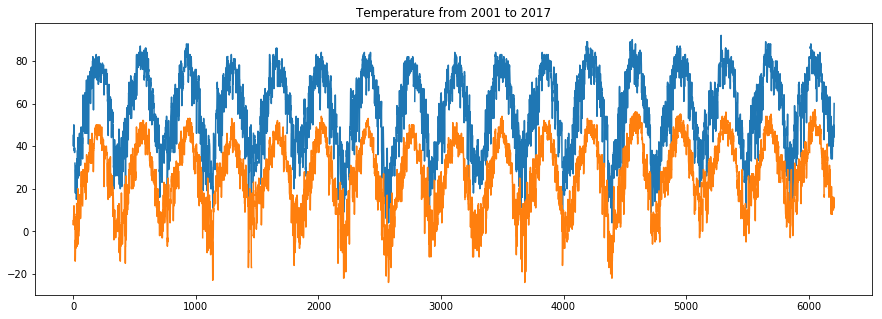

In [58]:
"""
This code after the model developed in
    "numpy.where"
    by SciPy.org
    https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.where.html
    My modifications have been to make the spliting more efficient.
"""
#ploting the figure from 2001 to 2017

#spliting the two years data with the function np.where()

dates = tempdata[0]
start = np.where(dates == '2016-01-01')[0][0]
stop  = np.where(dates=='2017-12-31')[0][0]
tdate = tempdata[:, start:stop]

tdate = dates[start:stop]
tdata = tempdata[1:3]

#to place all the missing point "M" with "NAN"

tdata[tdata=='M']='NAN'
tdata = tdata.astype(np.float)

plt.figure(figsize=(15,5))
plt.plot(tdata.T)
plt.title('Temperature from 2001 to 2017')
plt.savefig('data/temperature(2001-2017)).jpg')

In [59]:
#to clean all the missing points with '' and 'NAN'

"""
This code after the model developed in
"How to Clean Text for Machine Learning with Python"
by Jason Brownlee 
https://machinelearningmastery.com/clean-text-machine-learning-python/
My modifications have been to make the cleaning more efficient.
"""

with open('DATA/geog0111/data/delNorteT.dat', 'rb') as f:
    text = f.read().decode()
    
clean_txt = text.replace('A', '').replace('M', 'NAN').replace('T', 'NAN')
dates = [i.split('\t')[0] for i in clean_txt.split('\n')][1:]
data_txt = [i.split('\t')[1:] for i in clean_txt.split('\n')]
data = np.array(data_txt[:-1])[1:]
tdata = data.astype(float)

print(dates)
print(data)

['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08', '2001-01-09', '2001-01-10', '2001-01-11', '2001-01-12', '2001-01-13', '2001-01-14', '2001-01-15', '2001-01-16', '2001-01-17', '2001-01-18', '2001-01-19', '2001-01-20', '2001-01-21', '2001-01-22', '2001-01-23', '2001-01-24', '2001-01-25', '2001-01-26', '2001-01-27', '2001-01-28', '2001-01-29', '2001-01-30', '2001-01-31', '2001-02-01', '2001-02-02', '2001-02-03', '2001-02-04', '2001-02-05', '2001-02-06', '2001-02-07', '2001-02-08', '2001-02-09', '2001-02-10', '2001-02-11', '2001-02-12', '2001-02-13', '2001-02-14', '2001-02-15', '2001-02-16', '2001-02-17', '2001-02-18', '2001-02-19', '2001-02-20', '2001-02-21', '2001-02-22', '2001-02-23', '2001-02-24', '2001-02-25', '2001-02-26', '2001-02-27', '2001-02-28', '2001-03-01', '2001-03-02', '2001-03-03', '2001-03-04', '2001-03-05', '2001-03-06', '2001-03-07', '2001-03-08', '2001-03-09', '2001-03-10', '2001-03-11', '2001-03-12', '2001

## 2.1 Summary of Data

[[26. 24. 25. ... 45. 50. 52.]
 [-0.  3.  6. ... 15. 15. 11.]]
['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-05'
 '2016-01-06' '2016-01-07' '2016-01-08' '2016-01-09' '2016-01-10'
 '2016-01-11' '2016-01-12' '2016-01-13' '2016-01-14' '2016-01-15'
 '2016-01-16' '2016-01-17' '2016-01-18' '2016-01-19' '2016-01-20'
 '2016-01-21' '2016-01-22' '2016-01-23' '2016-01-24' '2016-01-25'
 '2016-01-26' '2016-01-27' '2016-01-28' '2016-01-29' '2016-01-30'
 '2016-01-31' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-06' '2016-02-07' '2016-02-08' '2016-02-09'
 '2016-02-10' '2016-02-11' '2016-02-12' '2016-02-13' '2016-02-14'
 '2016-02-15' '2016-02-16' '2016-02-17' '2016-02-18' '2016-02-19'
 '2016-02-20' '2016-02-21' '2016-02-22' '2016-02-23' '2016-02-24'
 '2016-02-25' '2016-02-26' '2016-02-27' '2016-02-28' '2016-02-29'
 '2016-03-01' '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05'
 '2016-03-06' '2016-03-07' '2016-03-08' '2016-03-09' '2016-03-10'
 '2016-03-11'

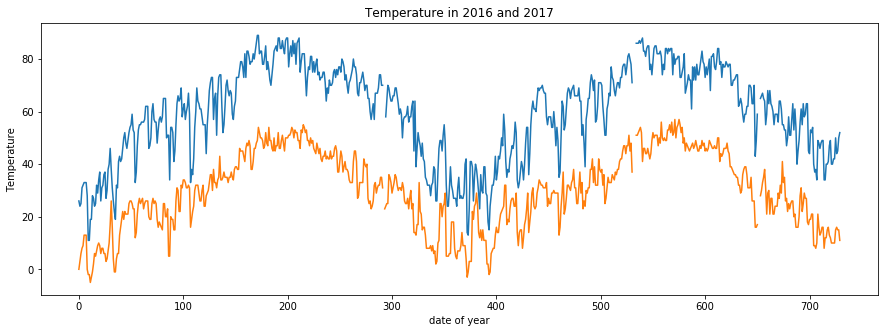

In [60]:
#printing the separate data and ploting the figure of 2016 and 2017

dates = tempdata[0]
start = np.where(dates == '2016-01-01')[0][0]
stop  = np.where(dates=='2017-12-31')[0][0]
tdate = tempdata[:, start:stop]

tdate = dates[start:stop]
tdata = tempdata[1:3,start:stop]

#replace the missing data with gap by using 'NAN'

"""
This code after the model developed in
"numpy.where"
by SciPy.org
https://docs.scipy.org/doc/numpy-1.15.1/reference/constants.html?highlight=nan#numpy.nan
My modifications have been to make the spliting more efficient.
"""

tdata[tdata=='M']=np.nan
tdata = tdata.astype(np.float)

print(tdata)
print(tdate)

#ploting the figure

plt.figure(figsize=(15,5))
plt.plot(tdata. T)
plt.title('Temperature in 2016 and 2017')
plt.xlabel("date of year")
plt.ylabel("Temperature")
plt.savefig('data/temperature(2016 and 2017).jpg')


In [61]:
#spliting the maxmum and minmum data of 2016

dates = tempdata[0]
start = np.where(dates == '2016-01-01')[0][0]
stop  = np.where(dates=='2016-12-31')[0][0]
tdate1 = tempdata[:, start:stop]

tdate1 = dates[start:stop]
tdata1 = tempdata[1:3,start:stop]

#spliting the dates and data

print(tdate1)
print(tdata1)

tdata1max = tempdata[1:2,start:stop]
tdata1min=tempdata[2:3,start:stop]

#spliting the maxmum and minimum data of 2016

print(tdata1max)
print(tdata1min)

['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-05'
 '2016-01-06' '2016-01-07' '2016-01-08' '2016-01-09' '2016-01-10'
 '2016-01-11' '2016-01-12' '2016-01-13' '2016-01-14' '2016-01-15'
 '2016-01-16' '2016-01-17' '2016-01-18' '2016-01-19' '2016-01-20'
 '2016-01-21' '2016-01-22' '2016-01-23' '2016-01-24' '2016-01-25'
 '2016-01-26' '2016-01-27' '2016-01-28' '2016-01-29' '2016-01-30'
 '2016-01-31' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-06' '2016-02-07' '2016-02-08' '2016-02-09'
 '2016-02-10' '2016-02-11' '2016-02-12' '2016-02-13' '2016-02-14'
 '2016-02-15' '2016-02-16' '2016-02-17' '2016-02-18' '2016-02-19'
 '2016-02-20' '2016-02-21' '2016-02-22' '2016-02-23' '2016-02-24'
 '2016-02-25' '2016-02-26' '2016-02-27' '2016-02-28' '2016-02-29'
 '2016-03-01' '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05'
 '2016-03-06' '2016-03-07' '2016-03-08' '2016-03-09' '2016-03-10'
 '2016-03-11' '2016-03-12' '2016-03-13' '2016-03-14' '2016-03-15'
 '2016-03-

In [62]:
#spliting the maxmum and minmum data of 2016

dates = tempdata[0]
start = np.where(dates == '2017-01-01')[0][0]
stop  = np.where(dates=='2017-12-31')[0][0]
tdate2 = tempdata[:, start:stop]

tdate2 = dates[start:stop]
tdata2 = tempdata[1:3,start:stop]

#spliting the dates and data

print(tdate2)
print(tdata2)

tdata2max = tempdata[1:2,start:stop]
tdata2min=tempdata[2:3,start:stop]

#spliting the maxmum and minimum data of 2016

print(tdata2max)
print(tdata2min)

['2017-01-01' '2017-01-02' '2017-01-03' '2017-01-04' '2017-01-05'
 '2017-01-06' '2017-01-07' '2017-01-08' '2017-01-09' '2017-01-10'
 '2017-01-11' '2017-01-12' '2017-01-13' '2017-01-14' '2017-01-15'
 '2017-01-16' '2017-01-17' '2017-01-18' '2017-01-19' '2017-01-20'
 '2017-01-21' '2017-01-22' '2017-01-23' '2017-01-24' '2017-01-25'
 '2017-01-26' '2017-01-27' '2017-01-28' '2017-01-29' '2017-01-30'
 '2017-01-31' '2017-02-01' '2017-02-02' '2017-02-03' '2017-02-04'
 '2017-02-05' '2017-02-06' '2017-02-07' '2017-02-08' '2017-02-09'
 '2017-02-10' '2017-02-11' '2017-02-12' '2017-02-13' '2017-02-14'
 '2017-02-15' '2017-02-16' '2017-02-17' '2017-02-18' '2017-02-19'
 '2017-02-20' '2017-02-21' '2017-02-22' '2017-02-23' '2017-02-24'
 '2017-02-25' '2017-02-26' '2017-02-27' '2017-02-28' '2017-03-01'
 '2017-03-02' '2017-03-03' '2017-03-04' '2017-03-05' '2017-03-06'
 '2017-03-07' '2017-03-08' '2017-03-09' '2017-03-10' '2017-03-11'
 '2017-03-12' '2017-03-13' '2017-03-14' '2017-03-15' '2017-03-16'
 '2017-03-

The mean value of daily tmax is  59.490358126721766
The maximum value of daily tmax is  89.0
The minimum value of daily tmax is  11.0
The min value of daily tmax is  29.27747252747253
The maximum value of daily tmin is  55.0
The minimum value of daily tmin is  -5.0


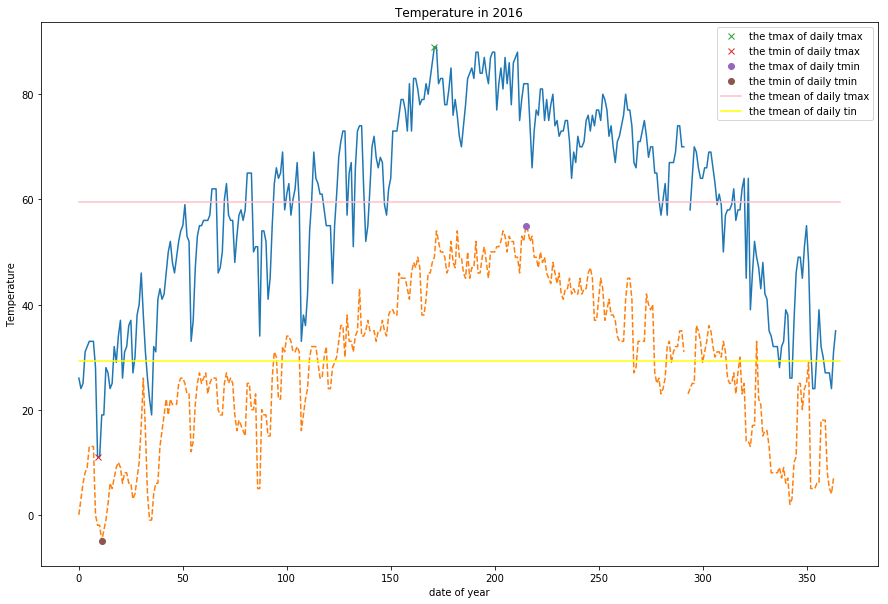

In [63]:
tdata11max = tdata1max[0].astype(float)
tdata11min=tdata1min[0].astype(float)

#masking the 'nan'(skiping the 'nan') then calculate the mean, maxmum and minimum of the data respectively
#ploting all the neccessary informtaion in the figure including mean, maxmum and minimum values

"""
This (np.ma.array) code after the model developed in
'argmin/argmax NaN behaviour #5110'
https://github.com/numpy/numpy/issues/5110
by saullocastro
My modifications have been to make the data analysis more efficient.
"""

#data analysis in the maximum of 2016
#to mask the 'nan'

tdata11max = np.ma.array(tdata11max, mask=np.isnan(tdata11max))
tmean1max=np.nanmean(tdata11max)
tmin1max=np.ma.array(tdata11max,mask=np.isnan(tdata11max))
tmax1max=np.ma.array(tdata11max,mask=np.isnan(tdata11max))
print('The mean value of daily tmax is ',tmean1max)
print('The maximum value of daily tmax is ',np.max(tdata11max))
print('The minimum value of daily tmax is ',np.min(tdata11max))

#data analysis in the minimum of 2016
#to mask the 'nan'

tdata11min = np.ma.array(tdata11min, mask=np.isnan(tdata11min))
tmean1min=np.nanmean(tdata11min)
tmin1min=np.ma.array(tdata11min,mask=np.isnan(tdata11min))
tmax1min=np.ma.array(tdata11min,mask=np.isnan(tdata11min))
print('The min value of daily tmax is ',tmean1min)
print('The maximum value of daily tmin is ',np.max(tdata11min))
print('The minimum value of daily tmin is ',np.min(tdata11min))

#ploting the diagram of the 2016
#to set up the arange of doy

doy=np.arange(0,366)

temperature1max= tdata1max[0][:366].astype(np.float)
temperature1min= tdata1min[0][:366].astype(np.float)

plt.figure(figsize=(15,10))

plt.plot(doy[:365],temperature1max.astype(float), '-')
plt.plot(doy[:365],temperature1min.astype(float), '--')
plt.plot(np.nanargmax(temperature1max), np.nanmax(temperature1max),'x', label="the tmax of daily tmax")
plt.plot(np.nanargmin(temperature1max), np.nanmin(temperature1max),'x', label="the tmin of daily tmax")
plt.plot(np.nanargmax(temperature1min), np.nanmax(temperature1min),'o', label="the tmax of daily tmin")
plt.plot(np.nanargmin(temperature1min), np.nanmin(temperature1min),'o', label="the tmin of daily tmin")
plt.plot([0,366],[tmean1max, tmean1max],label="the tmean of daily tmax",color='pink')
plt.plot([0,366],[tmean1min, tmean1min],label="the tmean of daily tin",color='yellow')

plt.title('Temperature in 2016')
plt.xlabel("date of year")
plt.ylabel("Temperature")
plt.legend(loc='best')
plt.savefig('data/temperature(2016).jpg')

The mean value of daily tmax is  60.36666666666667
The maximum value of daily tmax is  88.0
The minimum value of daily tmax is  13.0
The mean value of daily tmin is  30.830555555555556
The maximum value of daily tmin is  57.0
The minimum value of daily tmin is  -3.0


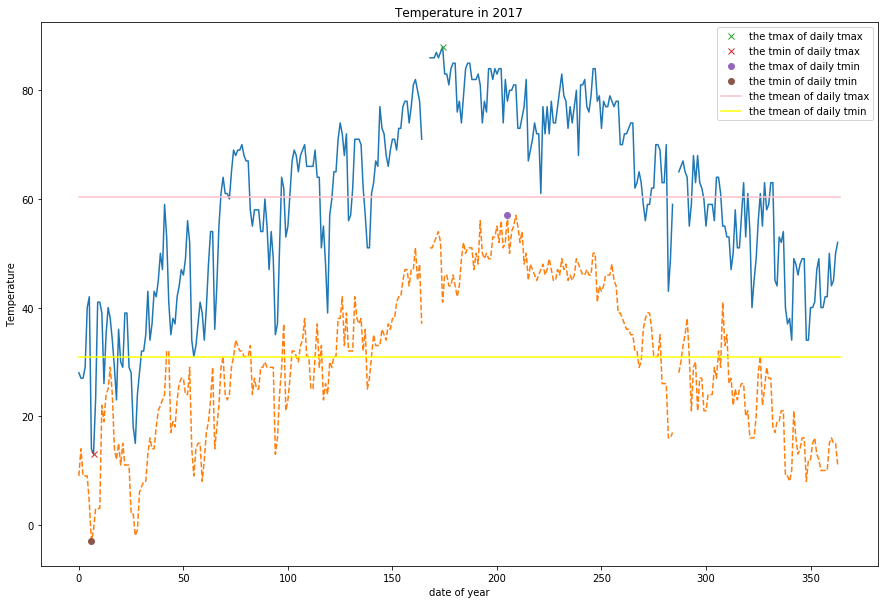

In [64]:
#masking the 'nan'(skiping the 'nan') then calculate the mean, maxmum and minimum of the data respectively
#ploting all the neccessary informtaion in the figure including mean, maxmum and minimum values

#data analysis in the maximum of 2016
#to mask the 'nan'

tdata21min = tdata2min[0].astype(float)
tdata21max=tdata2max[0].astype(float)

tdata21max = np.ma.array(tdata21max, mask=np.isnan(tdata21max))
tmean2max=np.nanmean(tdata21max)
tmin2max=np.ma.array(tdata21max,mask=np.isnan(tdata21max))
tmax2max=np.ma.array(tdata21max,mask=np.isnan(tdata21max))
print('The mean value of daily tmax is ',tmean2max)
print('The maximum value of daily tmax is ',np.max(tdata21max))
print('The minimum value of daily tmax is ',np.min(tdata21max))

#data analysis in the minimum of 2016
#to mask the 'nan'

tdata21min = np.ma.array(tdata21min, mask=np.isnan(tdata21min))
tmean2min=np.nanmean(tdata21min)
tmin2min=np.ma.array(tdata21min,mask=np.isnan(tdata21min))
tmax2min=np.ma.array(tdata21min,mask=np.isnan(tdata21min))
print('The mean value of daily tmin is ',tmean2min)
print('The maximum value of daily tmin is ',np.max(tdata21min))
print('The minimum value of daily tmin is ',np.min(tdata21min))

#ploting the diagram of the 2016
#to set up the arange of doy

doy=np.arange(0,366)

temperature2max= tdata2max[0][:365].astype(np.float)
temperature2min= tdata2min[0][:365].astype(np.float)

plt.figure(figsize=(15,10))

plt.plot(doy[:364],temperature2max.astype(float), '-')
plt.plot(doy[:364],temperature2min.astype(float), '--')
plt.plot(np.nanargmax(temperature2max), np.nanmax(temperature2max),'x',label="the tmax of daily tmax")
plt.plot(np.nanargmin(temperature2max), np.nanmin(temperature2max),'x', label="the tmin of daily tmax")
plt.plot(np.nanargmax(temperature2min), np.nanmax(temperature2min),'o', label="the tmax of daily tmin")
plt.plot(np.nanargmin(temperature2min), np.nanmin(temperature2min),'o', label="the tmin of daily tmin")
plt.plot([0,364],[tmean2max, tmean2max],label="the tmean of daily tmax",color='pink')
plt.plot([0,364],[tmean2min, tmean2min],label="the tmean of daily tmin",color='yellow')

plt.title('Temperature in 2017')
plt.xlabel("date of year")
plt.ylabel("Temperature")
plt.legend(loc='best')
plt.savefig('data/temperature(2017).jpg')

The data text has been saved into the 'DATA/geog0111/data/'. 
And all the selected data has been saved into the data/ 

In [129]:
"""
This code after the model developed in
"numpy.savez_compressed"
by SciPy.org
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savez_compressed.html
My modifications have been to make the saving more efficient.
"""

# Saving the datasets.

temperature2016 = tdata1
temperature2017 = tdata2
filename2016 = "temperature016.npz"
filename2017 = "temperature2017.npz"
np.savez_compressed(filename2016,temperature2016)
np.savez_compressed(filename2017,temperature2017)


In [98]:
#data summary

g=tmean1max
h=np.max(tdata11max)
i=np.min(tdata11max)
j=tmean1min
k=np.max(tdata11min)
l=np.min(tdata11min)
sdf3=pd.DataFrame([g,h,i,j,k,l],columns=['Data Summary of 2016'],index=['mean of daily tmax','max of daily tmax','min of daily tmax',
                                                                       'mean of daily tmin','max of daily tmin','min of daily tmin'])
print(sdf3)

print('---------------------------------------------')

m=tmean2max
n=np.max(tdata21max)
o=np.min(tdata21max)
p=tmean1min
q=np.max(tdata21min)
r=np.min(tdata21min)
sdf3=pd.DataFrame([g,h,i,j,k,l],columns=['Data Summary of 2017'],index=['mean of daily tmax','max of daily tmax','min of daily tmax',
                                                                       'mean of daily tmin','max of daily tmin','min of daily tmin'])
print(sdf3)

                    Data Summary of 2016
mean of daily tmax             59.490358
max of daily tmax              89.000000
min of daily tmax              11.000000
mean of daily tmin             29.277473
max of daily tmin              55.000000
min of daily tmin              -5.000000
---------------------------------------------
                    Data Summary of 2017
mean of daily tmax             59.490358
max of daily tmax              89.000000
min of daily tmax              11.000000
mean of daily tmin             29.277473
max of daily tmin              55.000000
min of daily tmin              -5.000000


## 3. Snow Cover

### 3.1 Downloading the data

In [30]:
#import necessary moduels needed in the coding

import requests
import numpy as np
import numpy.ma as ma
from dateutil import parser
import matplotlib.pylab as plt
%matplotlib inline
import sys
import os
from pathlib import Path
import gdal
from datetime import datetime, timedelta
from geog0111.geog_data import procure_dataset
import glob
from geog0111.create_blank_file import create_blank_file
from geog0111.get_modis_files import get_modis_files

In [31]:
"""
This code after the model developed in
"Chapter 3.2"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

import geog0111.nasa_requests as nasa_requests
from geog0111.cylog import cylog

url = 'https://n5eil01u.ecs.nsidc.org/MOST/' 
        
# grab the HTML information
try:
    html = nasa_requests.get(url).text
    # test a few lines of the html
    if html[:20] == '<!DOCTYPE HTML PUBLI':
        print('this seems to be ok ... ')
        print('use cylog().login() anywhere you need to specify the tuple (username,password)')
except:
    print('login error ... try entering your username password again')
    print('then re-run this cell until it works')
    cylog(init=True)

In [ ]:
"""
This code after the model developed in
"Chapter 4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#to download the snow cover data(MOD10AH1.hdf)

from geog0111.get_modis_files import get_modis_files
from datetime import datetime

years = [2017,2016]
tiles = ['h09v05']
destination_folder = 'data'

for year in years:
    ndoys = (datetime(year,12,31) - datetime(year,1,1)).days + 1
    for doy in range(1,ndoys+1,1):
        print(year,ndoys,doy,end=' ')
        filenames = get_modis_files(doy,year,tiles,base_url='https://n5eil01u.ecs.nsidc.org/MOST/',\
                                           version=6,
                                           product='MOD10A1')
        print(filenames)



In [32]:
"""
This code after the model developed in
"Chapter 3.2"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

from pathlib import Path

in_directory = Path('data')

filenames = in_directory.glob('*')
print('files in the directory',in_directory,':')
for f in filenames:
    print(f.name)
    
filenames = sorted(Path('data').glob('*'))

for f in filenames:
    print(f.name)

files in the directory data :
MOD10A1.A2017001.h09v05.006.2017014005824.hdf
MOD10A1.A2017002.h09v05.006.2017006134512.hdf
MOD10A1.A2017003.h09v05.006.2017006135042.hdf
MOD10A1.A2017004.h09v05.006.2017006094953.hdf
MOD10A1.A2017005.h09v05.006.2017007100948.hdf
MOD10A1.A2017006.h09v05.006.2017008054053.hdf
MOD10A1.A2017007.h09v05.006.2017009093245.hdf
MOD10A1.A2017008.h09v05.006.2017010104122.hdf
MOD10A1.A2017009.h09v05.006.2017011102207.hdf
MOD10A1.A2017010.h09v05.006.2017012100747.hdf
MOD10A1.A2017011.h09v05.006.2017013064323.hdf
MOD10A1.A2017012.h09v05.006.2017014105114.hdf
MOD10A1.A2017013.h09v05.006.2017015101916.hdf
MOD10A1.A2017014.h09v05.006.2017016100430.hdf
MOD10A1.A2017015.h09v05.006.2017017104000.hdf
MOD10A1.A2017016.h09v05.006.2017021020833.hdf
MOD10A1.A2017017.h09v05.006.2017020202105.hdf
MOD10A1.A2017018.h09v05.006.2017020065449.hdf
MOD10A1.A2017019.h09v05.006.2017024074641.hdf
MOD10A1.A2017020.h09v05.006.2017022060054.hdf
MOD10A1.A2017021.h09v05.006.2017023102058.hdf
MOD1

MCD15A3H.A2016209.h17v04.006.2016222122242.hdf
MCD15A3H.A2016209.h18v03.006.2016222122251.hdf
MCD15A3H.A2016209.h18v04.006.2016222122257.hdf
MCD15A3H.A2016213.h17v03.006.2016239132222.hdf
MCD15A3H.A2016213.h17v04.006.2016239132235.hdf
MCD15A3H.A2016213.h18v03.006.2016239132253.hdf
MCD15A3H.A2016213.h18v04.006.2016239132255.hdf
MCD15A3H.A2016217.h17v03.006.2016239132333.hdf
MCD15A3H.A2016217.h17v04.006.2016239132337.hdf
MCD15A3H.A2016217.h18v03.006.2016239132341.hdf
MCD15A3H.A2016217.h18v04.006.2016239132347.hdf
MCD15A3H.A2016221.h17v03.006.2016239132432.hdf
MCD15A3H.A2016221.h17v04.006.2016239132433.hdf
MCD15A3H.A2016221.h18v03.006.2016239132435.hdf
MCD15A3H.A2016221.h18v04.006.2016239132440.hdf
MCD15A3H.A2016225.h17v03.006.2016239132521.hdf
MCD15A3H.A2016225.h17v04.006.2016239132525.hdf
MCD15A3H.A2016225.h18v03.006.2016239132527.hdf
MCD15A3H.A2016225.h18v04.006.2016239132529.hdf
MCD15A3H.A2016229.h17v03.006.2016239132612.hdf
MCD15A3H.A2016229.h17v04.006.2016239132615.hdf
MCD15A3H.A201

In [33]:
"""
This code after the model developed in
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#try to open the files

modis_file = 'data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf'
g = gdal.Open(modis_file)
if g is None:
    print ('error opening file: HDF4 problem with GDAL?')
else:
    # note this has changed in collection 6
    data_layer = 'MOD_Grid_Snow_500m:NDSI_Snow_Cover'

    subdatasets = g.GetSubDatasets()
    for fname, name in subdatasets:
        print (name)
        print ("\t", fname)

    fname = 'HDF4_EOS:EOS_GRID:"%s":%s'%(modis_file,data_layer)
    raster = gdal.Open(fname)


[2400x2400] NDSI_Snow_Cover MOD_Grid_Snow_500m (8-bit unsigned integer)
	 HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover
[2400x2400] NDSI_Snow_Cover_Basic_QA MOD_Grid_Snow_500m (8-bit unsigned integer)
	 HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover_Basic_QA
[2400x2400] NDSI_Snow_Cover_Algorithm_Flags_QA MOD_Grid_Snow_500m (8-bit unsigned integer)
	 HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover_Algorithm_Flags_QA
[2400x2400] NDSI MOD_Grid_Snow_500m (16-bit integer)
	 HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI
[2400x2400] Snow_Albedo_Daily_Tile MOD_Grid_Snow_500m (8-bit unsigned integer)
	 HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:Snow_Albedo_Daily_Tile
[2400x2400] orbit_pnt MOD_Grid_Snow_500m (8-bit integer)
	 H

In [34]:
"""
This code taken from the model in
"Chapter 4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#check the shapefile 

!ogrinfo data/Hydrologic_Units/HUC_Polygons.shp HUC_Polygons -nomd -geom=NO -where "HUC=13010001"

INFO: Open of `data/Hydrologic_Units/HUC_Polygons.shp'
      using driver `ESRI Shapefile' successful.

Layer name: HUC_Polygons
Geometry: Polygon
Feature Count: 1
Extent: (-1207861.193700, -1295788.385400) - (-115932.919500, 152769.254400)
Layer SRS WKT:
PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",
    GEOGCS["GCS_North_American_1983",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS_1980",6378137.0,298.257222101]],
        PRIMEM["Greenwich",0.0],
        UNIT["Degree",0.0174532925199433],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["False_Easting",0.0],
    PARAMETER["False_Northing",0.0],
    PARAMETER["longitude_of_center",-96.0],
    PARAMETER["Standard_Parallel_1",29.5],
    PARAMETER["Standard_Parallel_2",45.5],
    PARAMETER["latitude_of_center",37.5],
    UNIT["Meter",1.0]]
HUC: Integer (9.0)
REG_NAME: String (50.0)
SUB_NAME: String (51.0)
ACC_NAME: String (36.0)
CAT_NAME: String (60.0)
HUC2: Integer (4.0

In [35]:
"""
This code after the model developed in
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#still try to open the files!
#to see what kind of layers in the hdf file

filenames = ['MOD10A1.A2016001.h09v05.006.2016183123533.hdf']
destination_folder="data"

for file_name in filenames:
    # form full filename as a string
    # and print with an underline of = 
    file_name = Path(destination_folder).joinpath(file_name).as_posix()
    print(file_name)
    print('='*len(file_name))
    
    # open the file as g
    g = gdal.Open(file_name)
    # loop over the subdatasets
    for d in g.GetSubDatasets():
        print(d)
        

data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf
('HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover', '[2400x2400] NDSI_Snow_Cover MOD_Grid_Snow_500m (8-bit unsigned integer)')
('HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover_Basic_QA', '[2400x2400] NDSI_Snow_Cover_Basic_QA MOD_Grid_Snow_500m (8-bit unsigned integer)')
('HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover_Algorithm_Flags_QA', '[2400x2400] NDSI_Snow_Cover_Algorithm_Flags_QA MOD_Grid_Snow_500m (8-bit unsigned integer)')
('HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI', '[2400x2400] NDSI MOD_Grid_Snow_500m (16-bit integer)')
('HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:Snow_Albedo_Daily_Tile', '[2400x2400] Snow_Albedo_Daily_Tile MOD_Grid_Snow_500m (8-bit unsi

In [36]:
from geog0111.geog_data import procure_dataset
from pathlib import Path
files = list(Path('data').glob('MOD10A1.A201[6-7]*h09v005.006*hdf'))
if len(files) < 732:
    _ = procure_dataset("lai_files",verbose=False)

In [37]:
#try to open 1 file again

"""
This code taken from the model in
'chapter 3.2 '
https://github.com/numpy/numpy/issues/5110
by P. Lewis
"""

g=gdal.Open('data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf')

sds=g.GetSubDatasets()
for s in sds:
    print(s[1])

[2400x2400] NDSI_Snow_Cover MOD_Grid_Snow_500m (8-bit unsigned integer)
[2400x2400] NDSI_Snow_Cover_Basic_QA MOD_Grid_Snow_500m (8-bit unsigned integer)
[2400x2400] NDSI_Snow_Cover_Algorithm_Flags_QA MOD_Grid_Snow_500m (8-bit unsigned integer)
[2400x2400] NDSI MOD_Grid_Snow_500m (16-bit integer)
[2400x2400] Snow_Albedo_Daily_Tile MOD_Grid_Snow_500m (8-bit unsigned integer)
[2400x2400] orbit_pnt MOD_Grid_Snow_500m (8-bit integer)
[2400x2400] granule_pnt MOD_Grid_Snow_500m (8-bit unsigned integer)


## 3.2 Try to plot something

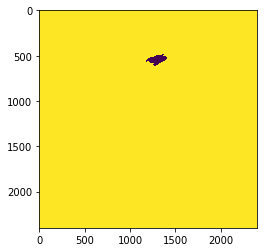

In [38]:
"""
This code taken from the model in
"Chapter 4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#try to plot one piece

from geog0111.raster_mask import raster_mask2
import pylab as plt
%matplotlib inline

m = raster_mask2(fname,\
                target_vector_file="DATA/geog0111/data/Hydrological_Units/HUC_Polygons.shp",\
                attribute_filter=2)
plt.imshow(m)

In [39]:
#to print out all the data in the file of MOD10A1.A2016001.h09v05.006.2016183123533.hdf

filename='data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf'
dataset_name=f'HDF4_EOS:EOS_GRID:"{filename:s}":MOD_Grid_Snow_500m:NDSI_Snow_Cover'
print(f"dataset:{dataset_name}")

g=gdal.Open(dataset_name)
data=g.ReadAsArray()

print(type(data))
print('max:',data.max())
print('min:',data.min())
print('unique values:',np.unique(data))
print(data) 
#data[data>100]=np.nan
#print(data)


dataset:HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover
<class 'numpy.ndarray'>
max: 255
min: 0
unique values: [  0  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 201 237 250 255]
[[ 78  80  77 ...  51  51  69]
 [ 79  77  76 ...  51  70  70]
 [ 76  75  70 ...  68  68  68]
 ...
 [250 250 250 ... 250 250 250]
 [250 250 250 ... 250 250 250]
 [250 250 250 ... 250 250 250]]


[12. 16. 18. ... nan nan nan]


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

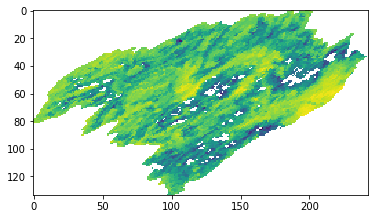

In [40]:
"""
This code after the model developed in
"Chapter 3.3"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#catchment for one day 

g=gdal.Warp("",fname,
           format='MEM',dstNodata=200,
           cutlineDSName='data/Hydrologic_Units/HUC_Polygons.shp',cutlineWhere='HUC=13010001',cropToCutline=True)
data=g.ReadAsArray().astype(float)
data[data>100]=np.nan
print(np.unique(data))
plt.imshow(data)
np.nanmean(data)
plt.colorbar 

In [42]:
"""
This code after the model developed in
"Chapter 4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""
#to see whether having the hdf

!gdalinfo data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf

Driver: HDF4/Hierarchical Data Format Release 4
Files: data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf
Size is 512, 512
Coordinate System is `'
Metadata:
  ALGORITHMPACKAGEACCEPTANCEDATE=12-2005
  ALGORITHMPACKAGEMATURITYCODE=Normal
  ALGORITHMPACKAGENAME=MOD_PR10A1
  ALGORITHMPACKAGEVERSION=5
  ASSOCIATEDINSTRUMENTSHORTNAME.1=MODIS
  ASSOCIATEDPLATFORMSHORTNAME.1=Terra
  ASSOCIATEDSENSORSHORTNAME.1=MODIS
  AUTOMATICQUALITYFLAG.1=Passed
  AUTOMATICQUALITYFLAG.2=Passed
  AUTOMATICQUALITYFLAGEXPLANATION.1=No automatic quality assessment done in the PGE
  AUTOMATICQUALITYFLAGEXPLANATION.2=No automatic quality assessment done in the PGE
  CHARACTERISTICBINANGULARSIZE=15.0
  CHARACTERISTICBINSIZE=463.312716527778
  DATACOLUMNS=2400
  DATAROWS=2400
  DAYNIGHTFLAG=Day
  DESCRREVISION=6.1
  EASTBOUNDINGCOORDINATE=-92.3664205550513
  EQUATORCROSSINGDATE.1=2016-01-01
  EQUATORCROSSINGDATE.2=2016-01-01
  EQUATORCROSSINGLONGITUDE.1=-96.9788782533844
  EQUATORCROSSINGLONGITUDE.2=-121.70091100820

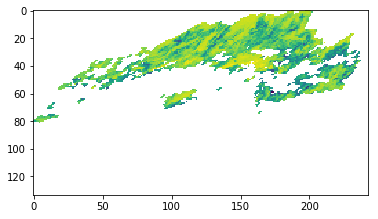

In [43]:
#try to do the catchment of one day in 2016

snow16=[]
data={}
file_template='HDF4_EOS:EOS_GRID:"%s":MOD_Grid_Snow_500m:%s'
year=2016
tile='h09v05'
layer = 'NDSI_Snow_Cover'
files=np.sort(glob.glob('data/MOD10A1.A%d*.%s.*.hdf'%(year,tile)))
#print(files)
dats = []
for i in files: 
    sub_fname = file_template %(i, layer)
    g=gdal.Warp("",sub_fname,
               format='MEM',dstNodata=200,
               cutlineDSName='data/Hydrologic_Units/HUC_Polygons.shp',cutlineWhere="HUC=13010001",cropToCutline=True)
    data=g.ReadAsArray().astype(float)
    data[data>100]=np.nan
    dats.append(data)
    #print(np.unique(data))
plt.imshow(data)

HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover
*********************************************************************************************************
<class 'numpy.ndarray'> uint8 (2400, 2400) 

<class 'numpy.ndarray'> float64 (2400, 2400) 

MOD10A1.A2016001.h09v05.006.2016183123533.png


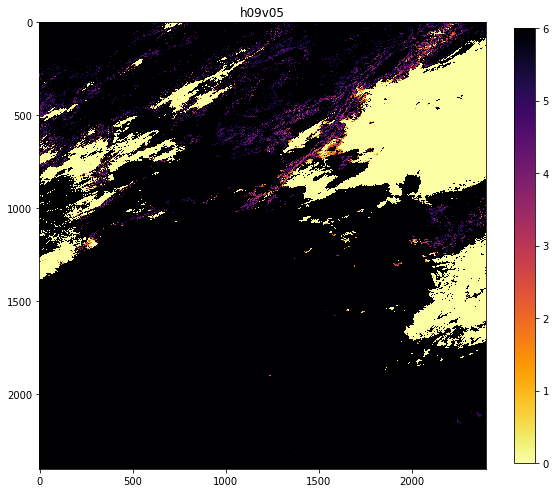

In [46]:
"""
This code taken from the 3.3.3.2 of chapter 3.3
    by P. Lewis

"""

#try to plot one day data

filenames = sorted(Path('data').glob('MOD10A1.A2016001.h09v05.006.2016183123533.hdf'))

out_directory = Path('image')

for filename in filenames:
    # pull the tile name from the filename
    # to use as plot title
    tile = filename.name.split('.')[2]
    
    dataset_name = f'HDF4_EOS:EOS_GRID:"{str(filename):s}\":MOD_Grid_Snow_500m:NDSI_Snow_Cover'
    g = gdal.Open(dataset_name,2)
    data = g.ReadAsArray()
    #scale_factor = float(g.GetMetadata()['scale_factor'])
    
    print(dataset_name) #,scale_factor)
    print('*'*len(dataset_name))
    print(type(data),data.dtype,data.shape,'\n')
    
    data = data * 0.1
    print(type(data),data.dtype,data.shape,'\n')
    plt.figure(figsize=(10,10))
    plt.imshow( data, vmin=0, vmax=6,cmap=plt.cm.inferno_r)
    plt.title(tile)
    plt.colorbar(shrink=0.8)
    
    # save figure as png
    plot_name = filename.stem + '.png'
    print(plot_name)
    out_filename = out_directory.joinpath(plot_name)
    #plt.savefig(out_filename)

## 3.3 Set condition variables

In this part, masking, cropping and extracting the data into a 3D numpy array, storing the data will be done. 


In [47]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""


# set up the dataset information

destination_folder = Path('data')
year = 2016
product = 'MOD10A1'
version = 6
tile = 'h09v05'
doy = 1
params =  ['NDSI_Snow_Cover','NDSI_Snow_Cover_Basic_QA']

#-----------------

# make a text-friendly version of tile
tile_ = tile.replace('[','_').replace(']','_').replace('-','')

# location of the shapefile
shape_file = destination_folder.\
                 joinpath('data/Hydrologic_Units/HUC_Polygons.shp').as_posix()

# define strings for the ip and op files
ipfile = destination_folder.\
                joinpath(f'{product}.A{year}{doy:03d}.{tile_}.{version:03d}').as_posix()

opfile = ipfile.replace(f'{doy:03d}.','').replace(tile,tile_)

print('ipfile',ipfile)
print('opfile',opfile)

# now glob the hdf files matching the pattern
filenames = list(destination_folder\
                .glob(f'{product}.A{year}{doy:03d}.{tile}.{version:03d}.*.hdf'))

# start with an empty list
ofiles = []

print(filenames)

#'HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover'

# loop over each parameter we need
for d in params:
    
    gdal_filenames = []
    for file_name in filenames:
        fname = f'HDF4_EOS:EOS_GRID:'+\
                f'"{file_name.as_posix()}":'+\
                f'MOD_Grid_Snow_500m:NDSI_Snow_Cover'
        gdal_filenames.append(fname)
    dataset_names = sorted(gdal_filenames)
    
    # mangle the dataset names
    dataset_names = sorted([f'HDF4_EOS:EOS_GRID:'+\
                         f'"{file_name.as_posix()}":'+\
                         f'MOD_Grid_Snow_500m:NDSI_Snow_Cover'\
                            for file_name in filenames])
    print(dataset_names)
    
    # derive some filenames for vrt files
    spatial_file = f'{opfile}.{doy:03d}.{d}.vrt'
    clipped_file = f'{opfile}.{doy:03d}_clip.{d}.vrt'
    
    # build the files
    g = gdal.BuildVRT(spatial_file, dataset_names)
    if(g):
        del(g)
        g = gdal.Warp(clipped_file,\
                                   spatial_file,\
                                   format='VRT', dstNodata=200,\
                                   cutlineDSName=shape_file,\
                                   cutlineWhere="HUC=13010001",\
                                   cropToCutline=True)
        if (g):
            del(g)
        ofiles.append(clipped_file)
print(ofiles)

ipfile data/MOD10A1.A2016001.h09v05.006
opfile data/MOD10A1.A2016h09v05.006
[PosixPath('data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf')]
['HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover']
['HDF4_EOS:EOS_GRID:"data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf":MOD_Grid_Snow_500m:NDSI_Snow_Cover']
['data/MOD10A1.A2016h09v05.006.001_clip.NDSI_Snow_Cover.vrt', 'data/MOD10A1.A2016h09v05.006.001_clip.NDSI_Snow_Cover_Basic_QA.vrt']


In [48]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

def find_modfiles(year, doy, tiles, folder):
    """Finds MCD15 files in a given folder for a date and set of tiles
    #TODO Missing documentation
    """
    data_folder = Path('data/')
    # Find all MOD files
    mod_files = []
   
        # Loop over all tiles, and search for files that have
        # the tile of interest
    sel_files = data_folder.glob(
            f"MOD10A1*.A{year:d}{doy:03d}.{tiles:s}.*hdf")
    for fich in sel_files:
        mod_files.append(fich)
    return mod_files

def create_gdal_friendly_names(filenames, layer):

    # Create GDAL friendly-names...
    gdal_filenames = []
    for file_name in filenames:
        fname = f'HDF4_EOS:EOS_GRID:'+\
                    f'"{file_name.as_posix()}":'+\
                    f'MOD_Grid_Snow_500m:{layer:s}'

        gdal_filenames.append(fname)
    return gdal_filenames


def mosaic_and_clip(tiles,
                    doy,
                    year,
                    folder="data/",
                    layer="NDSI_Snow_Cover",
                    shpfile="data/Hydrologic_Units/HUC_Polygons.shp"):
                    #country_code="LU"):

    folder_path = Path('data/')
    # Find all files to mosaic together
    hdf_files = find_modfiles(year, doy,tile,folder)

    # Create GDAL friendly-names...
    gdal_filenames = create_gdal_friendly_names(hdf_files, layer)

    g = gdal.Warp(
        "",
        gdal_filenames,
        format="MEM",
        dstNodata=255,
        cutlineDSName=shpfile,
        cutlineWhere='HUC=13010001',
        cropToCutline=True)
    data = g.ReadAsArray()
    return data


In [49]:
output1 = []

today = datetime(2016, 1, 1)
for time in range(366):
    if today.year != 2016:
        break
    doy = int(today.strftime("%j"))
    
    print(today, doy)
    try:
        UK_mosaic = mosaic_and_clip("h09v05", doy, 2016)
        output1.append(UK_mosaic)
    except:
        output1.append(np.zeros_like(UK_mosaic))
    today = today + timedelta(days=1)
    
output1 = np.array(output1)

2016-01-01 00:00:00 1
2016-01-02 00:00:00 2
2016-01-03 00:00:00 3
2016-01-04 00:00:00 4
2016-01-05 00:00:00 5
2016-01-06 00:00:00 6
2016-01-07 00:00:00 7
2016-01-08 00:00:00 8
2016-01-09 00:00:00 9
2016-01-10 00:00:00 10
2016-01-11 00:00:00 11
2016-01-12 00:00:00 12
2016-01-13 00:00:00 13
2016-01-14 00:00:00 14
2016-01-15 00:00:00 15
2016-01-16 00:00:00 16
2016-01-17 00:00:00 17
2016-01-18 00:00:00 18
2016-01-19 00:00:00 19
2016-01-20 00:00:00 20
2016-01-21 00:00:00 21
2016-01-22 00:00:00 22
2016-01-23 00:00:00 23
2016-01-24 00:00:00 24
2016-01-25 00:00:00 25
2016-01-26 00:00:00 26
2016-01-27 00:00:00 27
2016-01-28 00:00:00 28
2016-01-29 00:00:00 29
2016-01-30 00:00:00 30
2016-01-31 00:00:00 31
2016-02-01 00:00:00 32
2016-02-02 00:00:00 33
2016-02-03 00:00:00 34
2016-02-04 00:00:00 35
2016-02-05 00:00:00 36
2016-02-06 00:00:00 37
2016-02-07 00:00:00 38
2016-02-08 00:00:00 39
2016-02-09 00:00:00 40
2016-02-10 00:00:00 41
2016-02-11 00:00:00 42
2016-02-12 00:00:00 43
2016-02-13 00:00:00 

2016-12-17 00:00:00 352
2016-12-18 00:00:00 353
2016-12-19 00:00:00 354
2016-12-20 00:00:00 355
2016-12-21 00:00:00 356
2016-12-22 00:00:00 357
2016-12-23 00:00:00 358
2016-12-24 00:00:00 359
2016-12-25 00:00:00 360
2016-12-26 00:00:00 361
2016-12-27 00:00:00 362
2016-12-28 00:00:00 363
2016-12-29 00:00:00 364
2016-12-30 00:00:00 365
2016-12-31 00:00:00 366


In [50]:
output2 = []

today = datetime(2017, 1, 1)
for time in range(365):
    if today.year != 2017:
        break
    doy = int(today.strftime("%j"))
    
    print(today, doy)
    try:
        UK_mosaic = mosaic_and_clip("h09v05", doy, 2017)
        output2.append(UK_mosaic)
    except:
        output2.append(np.zeros_like(UK_mosaic))
    today = today + timedelta(days=1)
    
output2 = np.array(output2)

2017-01-01 00:00:00 1
2017-01-02 00:00:00 2
2017-01-03 00:00:00 3
2017-01-04 00:00:00 4
2017-01-05 00:00:00 5
2017-01-06 00:00:00 6
2017-01-07 00:00:00 7
2017-01-08 00:00:00 8
2017-01-09 00:00:00 9
2017-01-10 00:00:00 10
2017-01-11 00:00:00 11
2017-01-12 00:00:00 12
2017-01-13 00:00:00 13
2017-01-14 00:00:00 14
2017-01-15 00:00:00 15
2017-01-16 00:00:00 16
2017-01-17 00:00:00 17
2017-01-18 00:00:00 18
2017-01-19 00:00:00 19
2017-01-20 00:00:00 20
2017-01-21 00:00:00 21
2017-01-22 00:00:00 22
2017-01-23 00:00:00 23
2017-01-24 00:00:00 24
2017-01-25 00:00:00 25
2017-01-26 00:00:00 26
2017-01-27 00:00:00 27
2017-01-28 00:00:00 28
2017-01-29 00:00:00 29
2017-01-30 00:00:00 30
2017-01-31 00:00:00 31
2017-02-01 00:00:00 32
2017-02-02 00:00:00 33
2017-02-03 00:00:00 34
2017-02-04 00:00:00 35
2017-02-05 00:00:00 36
2017-02-06 00:00:00 37
2017-02-07 00:00:00 38
2017-02-08 00:00:00 39
2017-02-09 00:00:00 40
2017-02-10 00:00:00 41
2017-02-11 00:00:00 42
2017-02-12 00:00:00 43
2017-02-13 00:00:00 

2017-12-13 00:00:00 347
2017-12-14 00:00:00 348
2017-12-15 00:00:00 349
2017-12-16 00:00:00 350
2017-12-17 00:00:00 351
2017-12-18 00:00:00 352
2017-12-19 00:00:00 353
2017-12-20 00:00:00 354
2017-12-21 00:00:00 355
2017-12-22 00:00:00 356
2017-12-23 00:00:00 357
2017-12-24 00:00:00 358
2017-12-25 00:00:00 359
2017-12-26 00:00:00 360
2017-12-27 00:00:00 361
2017-12-28 00:00:00 362
2017-12-29 00:00:00 363
2017-12-30 00:00:00 364
2017-12-31 00:00:00 365


In [51]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

#try to find the modfiles 

def find_modfiles(year, doy, tiles, folder):
    """Finds MCD15 files in a given folder for a date and set of tiles
    #TODO Missing documentation
    """
    data_folder = Path('data/')
    # Find all MOD files
    mod_files = []
   
        # Loop over all tiles, and search for files that have
        # the tile of interest
    sel_files = data_folder.glob(
            f"MOD10A1*.A{year:d}{doy:03d}.{tiles:s}.*hdf")
    for fich in sel_files:
        mod_files.append(fich)
    return mod_files

# Test with two dates
results = find_modfiles(2016, 1, "h09v05",
                       folder="data/")

print(results)

[PosixPath('data/MOD10A1.A2016001.h09v05.006.2016183123533.hdf')]


In [65]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

#Given a list of HDF filenames, and a layer, create
#a list of GDAL pointers to an internal layer in the 
#filenames given.
#TODO docstring needs improvements

def create_gdal_friendly_names(filenames, layer):

    # Create GDAL friendly-names...
    gdal_filenames = []
    for file_name in filenames:
        # Convert filename to a string. Could also do it with
        # str(file_name)
        fname = file_name.as_posix()
        # Create the GDAL pointer name
        fname = f'HDF4_EOS:EOS_GRID:"{fname:s}":MOD_Grid_Snow_500m:{layer:s}'
        gdal_filenames.append(fname)
    return gdal_filenames


# Testing! Get some filenames from find_mcdfiles....
results = find_modfiles(2016, 45, "h09v05",
                       folder="data")

gdal_filenames = create_gdal_friendly_names(results, "NDSI_Snow_Cover")
for gname in gdal_filenames:
    print(gdal.Info(gname, stats=True))
    break
    
# Check another layer...
gdal_filenames = create_gdal_friendly_names(results, "FparLai_QC")
for gname in gdal_filenames:
    print(gdal.Info(gname, stats=True))
    break

Driver: HDF4Image/HDF4 Dataset
Files: data/MOD10A1.A2016045.h09v05.006.2016047062804.hdf
       data/MOD10A1.A2016045.h09v05.006.2016047062804.hdf.aux.xml
Size is 2400, 2400
Coordinate System is:
PROJCS["unnamed",
    GEOGCS["Unknown datum based upon the custom spheroid",
        DATUM["Not specified (based on custom spheroid)",
            SPHEROID["Custom spheroid",6371007.181,0]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Sinusoidal"],
    PARAMETER["longitude_of_center",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]
Origin = (-10007554.676999999210238,4447802.078666999936104)
Pixel Size = (463.312716527916507,-463.312716527916677)
Metadata:
  ALGORITHMPACKAGEACCEPTANCEDATE=12-2005
  ALGORITHMPACKAGEMATURITYCODE=Normal
  ALGORITHMPACKAGENAME=MOD_PR10A1
  ALGORITHMPACKAGEVERSION=5
  ASSOCIATEDINSTRUMENTSHORTNAME.1=MODIS
  ASSOCIATEDPLATFORMSHORTNAME.1=Terra
  ASSOCIATEDSENSORSHORTNAME.1=MO

extracting the data into a 3D numpy array

In [66]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

def mosaic_and_clip(tiles,
                    doy,
                    year,
                    folder="data/",
                    layer="NDSI_Snow_Cover",
                    shpfile="data/Hydrologic_Units/HUC_Polygons.shp",
                    cutlineWhere='HUC=13010001',
                    format="MEM"):
    
    folder_path = Path(folder)
    # Find all files to mosaic together
    hdf_files = find_modfiles(year, doy, tiles, folder)

    # Create GDAL friendly-names...
    gdal_filenames = create_gdal_friendly_names(hdf_files, layer)    
    
    
    
    #if frmat == "MEM":
    g = gdal.Warp("",
        gdal_filenames,
        format="MEM",
        dstNodata=255,
        cutlineDSName=shpfile,
        cutlineWhere="HUC=13010001",
        cropToCutline=True)
    data = g.ReadAsArray()
    return data

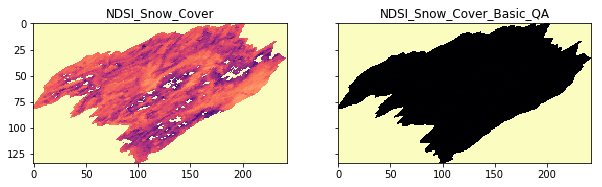

In [67]:
# Testing numpy return arrays
tiles = "h09v05"
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

for i, the_layer in enumerate(['NDSI_Snow_Cover','NDSI_Snow_Cover_Basic_QA']):
    data =  mosaic_and_clip(tiles,
                    1,
                    2016,
                    folder="data/",
                    layer=the_layer,
                    shpfile="data/Hydrologic_Units/HUC_Polygons.shp",
                    format="MEM")
    axs[i].imshow(data, interpolation="nearest", vmin=0, vmax=100,
                 cmap=plt.cm.magma)
    axs[i].set_title(the_layer)

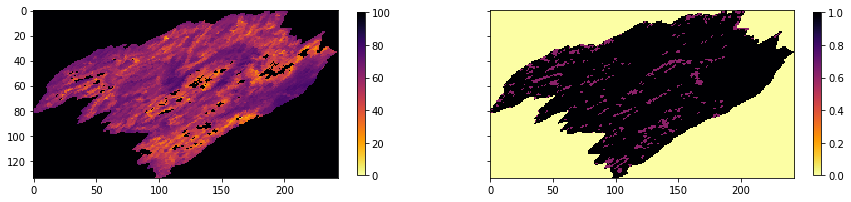

In [68]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

def get_scaling(qa_data, golden_ratio=0.61803398875):
    weight = np.zeros_like(qa_data, dtype=np.float)
    for qa_val in [0, 1, 2, 3]:
        weight[qa_data == qa_val] = np.power(golden_ratio, float(qa_val))
    return weight


#sfc_qa = get_sfc_qc(qa_data)
#weights = get_scaling(qa_data)

#plt.figure(figsize=(10,10))
#plt.imshow(weights, vmin=0, vmax=1, interpolation="nearest", 
           #cmap=plt.cm.inferno)
#plt.colorbar()
#plt.title("Weight")

def process_single_date(tiles,
                    doy,
                    year,
                    folder="data/",
                    shpfile="data/Hydrologic_Units/HUC_Polygons.shp",
                    format="MEM"):
    
    lai_data = mosaic_and_clip(tiles,
                    doy,
                    year,
                    folder=folder,
                    layer="NDSI_Snow_Cover",
                    shpfile=shpfile,
                    format="MEM")
    # Note the scaling!
    
    qa_data = mosaic_and_clip(tiles,
                    doy,
                    year,
                    folder=folder,
                    layer="NDSI_Snow_Cover_Basic_QA",
                    shpfile=shpfile,
                    format="MEM")
    #sfc_qa = get_sfc_qc(qa_data)

    weights = get_scaling(qa_data)
    return lai_data, weights
    
#test

lai, weights =  process_single_date('h09v05',
                    1,
                    2016)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                       figsize=(15, 15))
img1 = axs[0].imshow(lai, interpolation="nearest", vmin=0, vmax=100,cmap=plt.cm.inferno_r)
img2 = axs[1].imshow(weights, interpolation="nearest", vmin=0,cmap=plt.cm.inferno_r)

plt.colorbar(img1,ax=axs[0],shrink=0.2)
plt.colorbar(img2,ax=axs[1],shrink=0.2)



## 3.4 Time Series

There is 10 missing days (doy(49) to doy(58)) in the year of 2016.
As for 2017, there is only 1 missing days (doy(214)).

In [106]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""
#to do the time series of 2016

from datetime import datetime, timedelta

def process_timeseries(year,
                       tiles,
                       folder,
                       shpfile,
                       verbose=True):

    today = datetime(year, 1, 1)
    dates = []
    #output1 = []
    for i in range(366):
        if (i%1 == 0) and verbose:
            print(f"Doing {str(today):s}")
        if today.year != year:
            break
        doy = int(today.strftime("%j"))
        
        #skip missing data
        if (doy==49) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==50) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==51) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==52) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==53) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==54) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==55) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==56) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==57) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==58) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
            
        this_lai, this_weight = process_single_date(
            tiles,
            doy,
            year,
            folder=folder,
            shpfile=shpfile,
            format="MEM")
        if doy == 1:
            # First day, create outputs!
            ny, nx = this_lai.shape
            lai_array1 = np.zeros((ny, nx, 366))
            weights_array1 = np.zeros((ny, nx, 366))
        lai_array1[:, :, i] = this_lai
        weights_array1[:, :, i] = this_weight
        dates.append(today)
        today = today + timedelta(days=1)
        
    return dates, lai_array1, weights_array1


tiles = 'h09v05'

year = 2016

dates, lai_array1, weights_array1 = process_timeseries(
    year,
    tiles,
    folder="data/",
    shpfile="data/Hydrologic_Units/HUC_Polygons.shp")

Doing 2016-01-01 00:00:00
Doing 2016-01-02 00:00:00
Doing 2016-01-03 00:00:00
Doing 2016-01-04 00:00:00
Doing 2016-01-05 00:00:00
Doing 2016-01-06 00:00:00
Doing 2016-01-07 00:00:00
Doing 2016-01-08 00:00:00
Doing 2016-01-09 00:00:00
Doing 2016-01-10 00:00:00
Doing 2016-01-11 00:00:00
Doing 2016-01-12 00:00:00
Doing 2016-01-13 00:00:00
Doing 2016-01-14 00:00:00
Doing 2016-01-15 00:00:00
Doing 2016-01-16 00:00:00
Doing 2016-01-17 00:00:00
Doing 2016-01-18 00:00:00
Doing 2016-01-19 00:00:00
Doing 2016-01-20 00:00:00
Doing 2016-01-21 00:00:00
Doing 2016-01-22 00:00:00
Doing 2016-01-23 00:00:00
Doing 2016-01-24 00:00:00
Doing 2016-01-25 00:00:00
Doing 2016-01-26 00:00:00
Doing 2016-01-27 00:00:00
Doing 2016-01-28 00:00:00
Doing 2016-01-29 00:00:00
Doing 2016-01-30 00:00:00
Doing 2016-01-31 00:00:00
Doing 2016-02-01 00:00:00
Doing 2016-02-02 00:00:00
Doing 2016-02-03 00:00:00
Doing 2016-02-04 00:00:00
Doing 2016-02-05 00:00:00
Doing 2016-02-06 00:00:00
Doing 2016-02-07 00:00:00
Doing 2016-0

Doing 2016-11-12 00:00:00
Doing 2016-11-13 00:00:00
Doing 2016-11-14 00:00:00
Doing 2016-11-15 00:00:00
Doing 2016-11-16 00:00:00
Doing 2016-11-17 00:00:00
Doing 2016-11-18 00:00:00
Doing 2016-11-19 00:00:00
Doing 2016-11-20 00:00:00
Doing 2016-11-21 00:00:00
Doing 2016-11-22 00:00:00
Doing 2016-11-23 00:00:00
Doing 2016-11-24 00:00:00
Doing 2016-11-25 00:00:00
Doing 2016-11-26 00:00:00
Doing 2016-11-27 00:00:00
Doing 2016-11-28 00:00:00
Doing 2016-11-29 00:00:00
Doing 2016-11-30 00:00:00
Doing 2016-12-01 00:00:00
Doing 2016-12-02 00:00:00
Doing 2016-12-03 00:00:00
Doing 2016-12-04 00:00:00
Doing 2016-12-05 00:00:00
Doing 2016-12-06 00:00:00
Doing 2016-12-07 00:00:00
Doing 2016-12-08 00:00:00
Doing 2016-12-09 00:00:00
Doing 2016-12-10 00:00:00
Doing 2016-12-11 00:00:00
Doing 2016-12-12 00:00:00
Doing 2016-12-13 00:00:00
Doing 2016-12-14 00:00:00
Doing 2016-12-15 00:00:00
Doing 2016-12-16 00:00:00
Doing 2016-12-17 00:00:00
Doing 2016-12-18 00:00:00
Doing 2016-12-19 00:00:00
Doing 2016-1

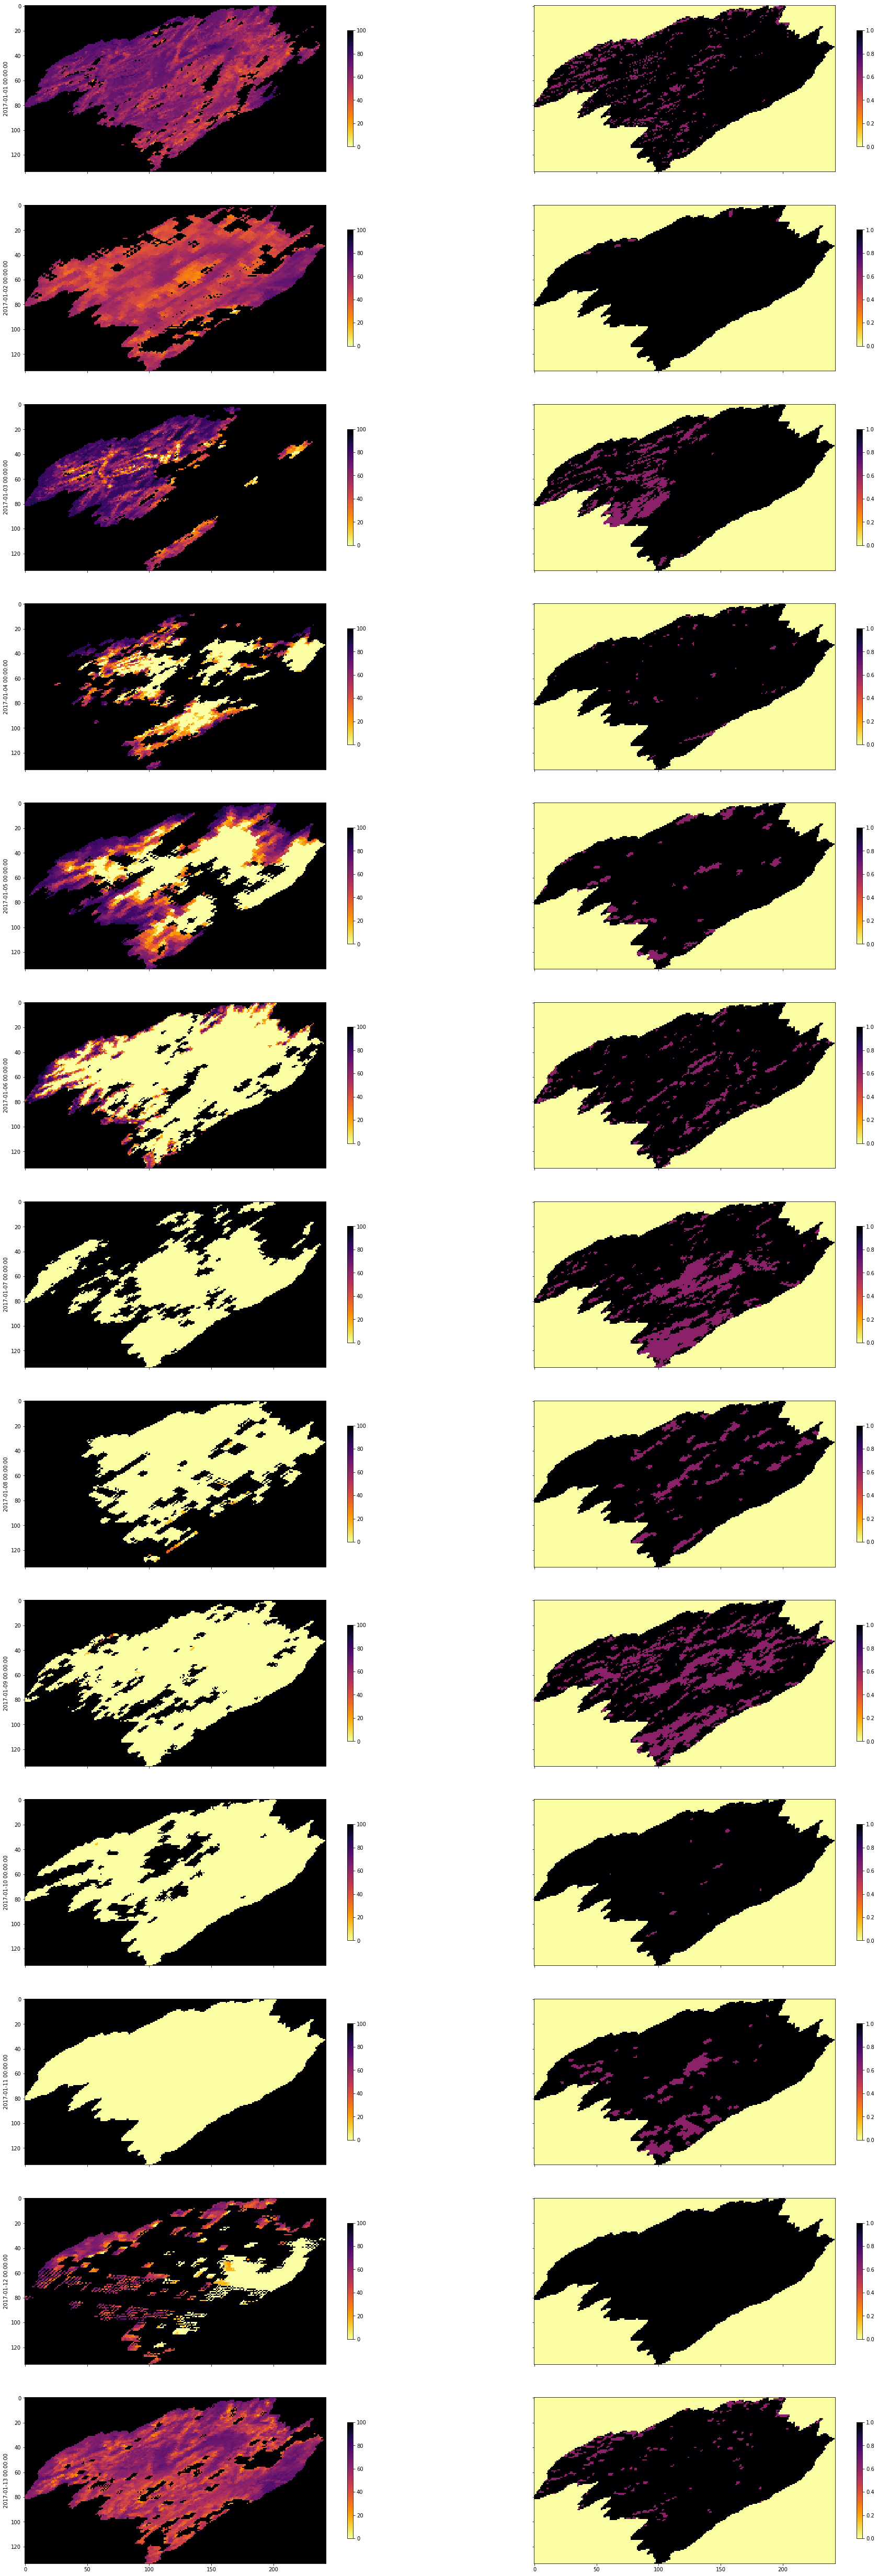

In [109]:
#to plot 13 figures in a nearly average way 

"""
This code is developed based on "chapter 3.4"
    by P. Lewis 
    https://github.com/profLewis/geog0111

    
author = "P Lewis"
email= "p.lewis@ucl.ac.uk"
license= "GPLv3"
copyright= "Copyright.2018.P.Lewis"
"""

fig, axs = plt.subplots(nrows=13, ncols=2, sharex=True,
                        sharey=True, figsize=(32, 90))

#Spliting them equally in 30 days, but some days are not in a good weather, choose another closer day to replace it.

for i, tstep in enumerate([4,35, 64, 95,124,153,185,213,240,271,300,330,360]):
    img1 = axs[i][0].imshow(lai_array1[:, :, tstep],
                    interpolation="nearest", vmin=0, vmax=100,
              cmap=plt.cm.inferno_r)
    img2 = axs[i][1].imshow(weights_array1[:, :, tstep],
                    interpolation="nearest", vmin=0, vmax=1,
              cmap=plt.cm.inferno_r)

    plt.colorbar(img1,ax=axs[i][0],shrink=0.7)
    plt.colorbar(img2,ax=axs[i][1],shrink=0.7)
    axs[i][0].set_ylabel(dates[i])

In [108]:
#to do the time series of 2017

from datetime import datetime, timedelta

def process_timeseries(year,
                       tiles,
                       folder,
                       shpfile,
                       verbose=True):

    today = datetime(year, 1, 1)
    dates = []
    for i in range(365):
        if (i%1 == 0) and verbose:
            print(f"Doing {str(today):s}")
        if today.year != year:
            break
        doy = int(today.strftime("%j"))
        
        #skip missing data
        if (doy==114) and (today.year == 2017):
            today=today+timedelta(days=1)
            continue
            
        this_lai, this_weight = process_single_date(
            tiles,
            doy,
            year,
            folder=folder,
            shpfile=shpfile,
            format="MEM")
        if doy == 1:
            # First day, create outputs!
            ny, nx = this_lai.shape
            lai_array2 = np.zeros((ny, nx, 365))
            weights_array2 = np.zeros((ny, nx, 365))
        lai_array2[:, :, i] = this_lai
        weights_array2[:, :, i] = this_weight
        dates.append(today)
        today = today + timedelta(days=1)
        
    return dates, lai_array2, weights_array2


tiles = 'h09v05'

year = 2017

dates, lai_array2, weights_array2 = process_timeseries(
    year,
    tiles,
    folder="data/",
    shpfile="data/Hydrologic_Units/HUC_Polygons.shp")



Doing 2017-01-01 00:00:00
Doing 2017-01-02 00:00:00
Doing 2017-01-03 00:00:00
Doing 2017-01-04 00:00:00
Doing 2017-01-05 00:00:00
Doing 2017-01-06 00:00:00
Doing 2017-01-07 00:00:00
Doing 2017-01-08 00:00:00
Doing 2017-01-09 00:00:00
Doing 2017-01-10 00:00:00
Doing 2017-01-11 00:00:00
Doing 2017-01-12 00:00:00
Doing 2017-01-13 00:00:00
Doing 2017-01-14 00:00:00
Doing 2017-01-15 00:00:00
Doing 2017-01-16 00:00:00
Doing 2017-01-17 00:00:00
Doing 2017-01-18 00:00:00
Doing 2017-01-19 00:00:00
Doing 2017-01-20 00:00:00
Doing 2017-01-21 00:00:00
Doing 2017-01-22 00:00:00
Doing 2017-01-23 00:00:00
Doing 2017-01-24 00:00:00
Doing 2017-01-25 00:00:00
Doing 2017-01-26 00:00:00
Doing 2017-01-27 00:00:00
Doing 2017-01-28 00:00:00
Doing 2017-01-29 00:00:00
Doing 2017-01-30 00:00:00
Doing 2017-01-31 00:00:00
Doing 2017-02-01 00:00:00
Doing 2017-02-02 00:00:00
Doing 2017-02-03 00:00:00
Doing 2017-02-04 00:00:00
Doing 2017-02-05 00:00:00
Doing 2017-02-06 00:00:00
Doing 2017-02-07 00:00:00
Doing 2017-0

Doing 2017-11-15 00:00:00
Doing 2017-11-16 00:00:00
Doing 2017-11-17 00:00:00
Doing 2017-11-18 00:00:00
Doing 2017-11-19 00:00:00
Doing 2017-11-20 00:00:00
Doing 2017-11-21 00:00:00
Doing 2017-11-22 00:00:00
Doing 2017-11-23 00:00:00
Doing 2017-11-24 00:00:00
Doing 2017-11-25 00:00:00
Doing 2017-11-26 00:00:00
Doing 2017-11-27 00:00:00
Doing 2017-11-28 00:00:00
Doing 2017-11-29 00:00:00
Doing 2017-11-30 00:00:00
Doing 2017-12-01 00:00:00
Doing 2017-12-02 00:00:00
Doing 2017-12-03 00:00:00
Doing 2017-12-04 00:00:00
Doing 2017-12-05 00:00:00
Doing 2017-12-06 00:00:00
Doing 2017-12-07 00:00:00
Doing 2017-12-08 00:00:00
Doing 2017-12-09 00:00:00
Doing 2017-12-10 00:00:00
Doing 2017-12-11 00:00:00
Doing 2017-12-12 00:00:00
Doing 2017-12-13 00:00:00
Doing 2017-12-14 00:00:00
Doing 2017-12-15 00:00:00
Doing 2017-12-16 00:00:00
Doing 2017-12-17 00:00:00
Doing 2017-12-18 00:00:00
Doing 2017-12-19 00:00:00
Doing 2017-12-20 00:00:00
Doing 2017-12-21 00:00:00
Doing 2017-12-22 00:00:00
Doing 2017-1

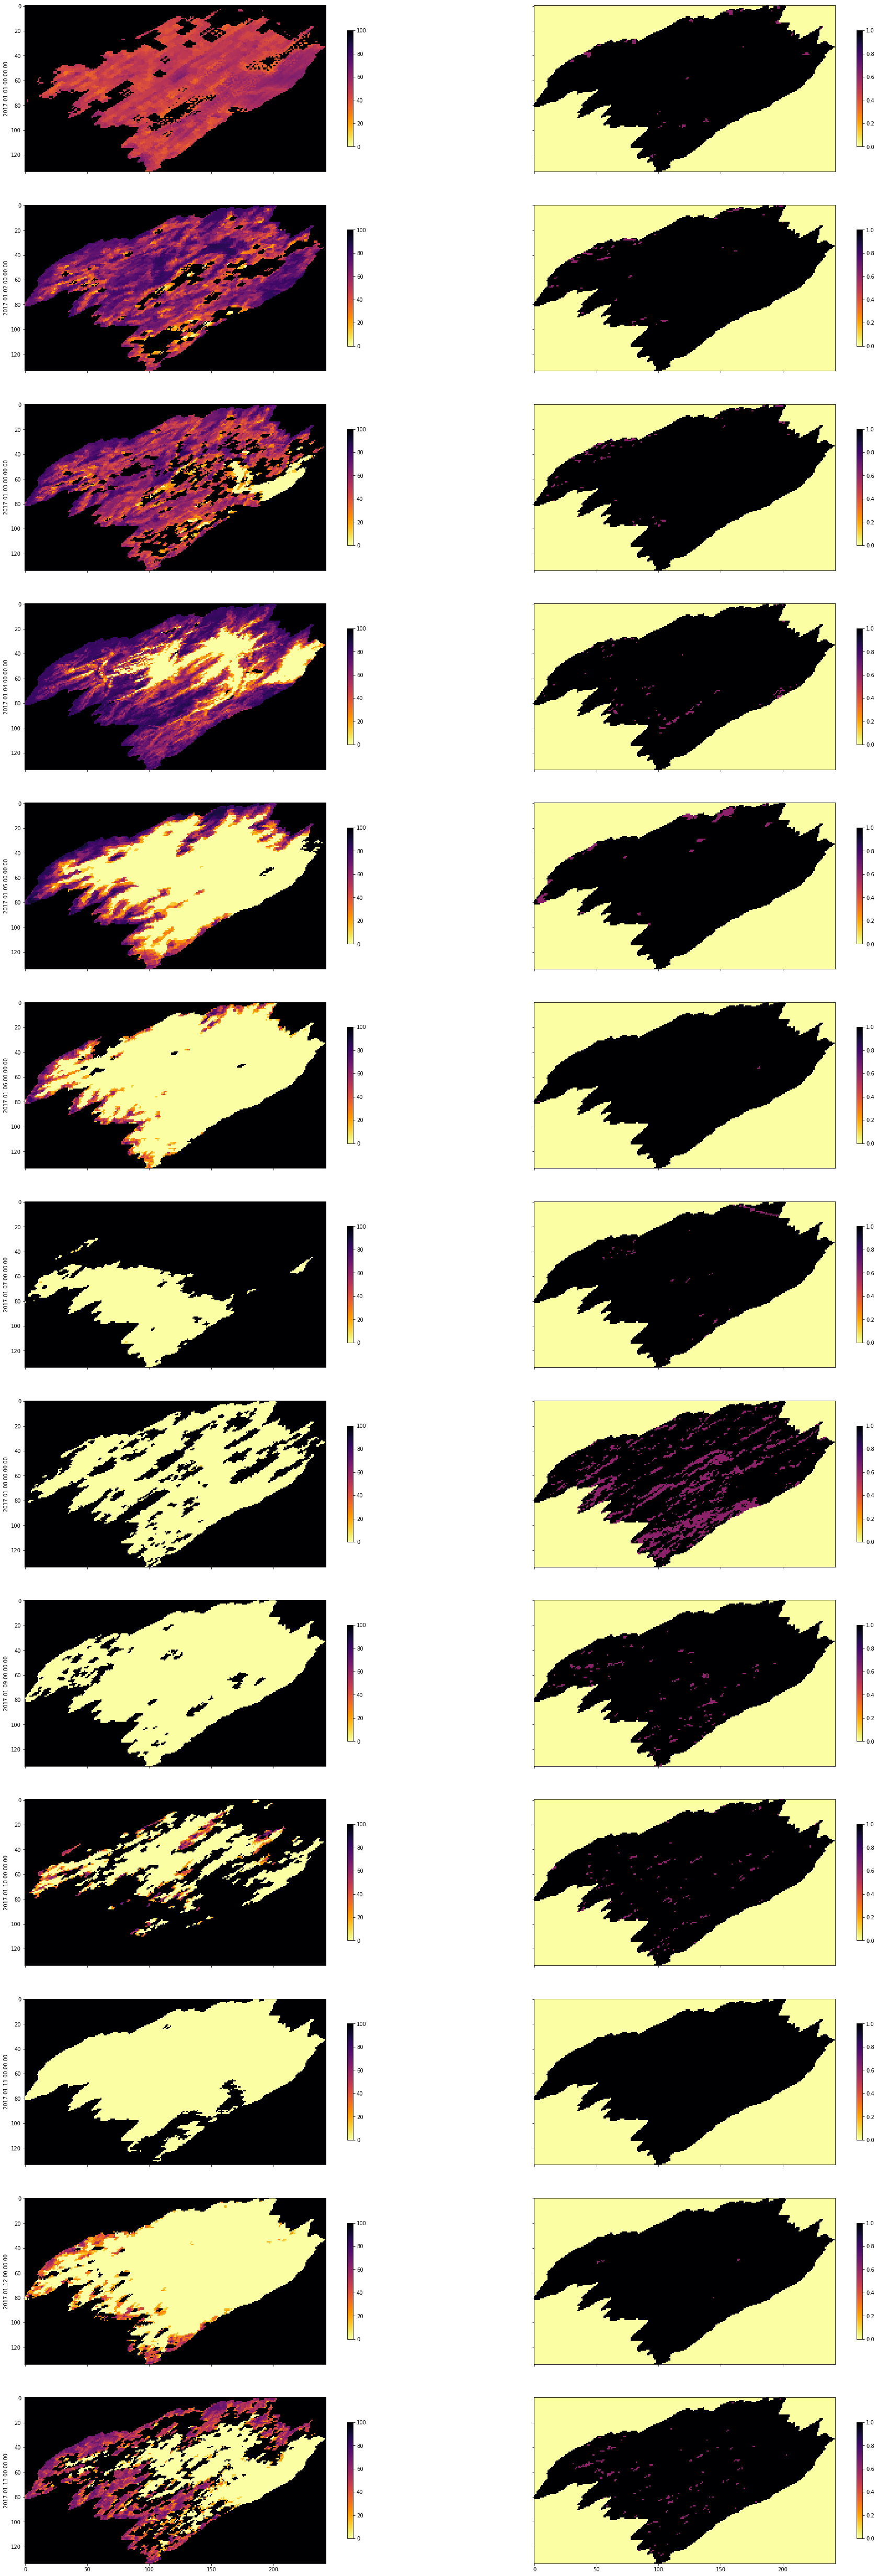

In [110]:
#to plot 13 figures in a nearly average way 

"""
This code is developed based on "chapter 3.4"
    by P. Lewis 
    https://github.com/profLewis/geog0111

    
author = "P Lewis"
email= "p.lewis@ucl.ac.uk"
license= "GPLv3"
copyright= "Copyright.2018.P.Lewis"
"""

fig, axs = plt.subplots(nrows=13, ncols=2, sharex=True,
                        sharey=True, figsize=(32, 90))

#Spliting them equally in 30 days, but some days are not in a good weather, choose another closer day to replace it.

for i, tstep in enumerate([5,35, 65, 95,124,154,182,212,239,271,300,330,360]):
    img1 = axs[i][0].imshow(lai_array2[:, :, tstep],
                    interpolation="nearest", vmin=0, vmax=100,
              cmap=plt.cm.inferno_r)
    img2 = axs[i][1].imshow(weights_array2[:, :, tstep],
                    interpolation="nearest", vmin=0, vmax=1,
              cmap=plt.cm.inferno_r)

    plt.colorbar(img1,ax=axs[i][0],shrink=0.7)
    plt.colorbar(img2,ax=axs[i][1],shrink=0.7)
    axs[i][0].set_ylabel(dates[i])

## 3.5 Weighted interpolation

In [111]:
from datetime import datetime, timedelta

def process_timeseries(year,
                       tiles,
                       folder,
                       shpfile,
                       verbose=True):

    today = datetime(year, 1, 1)
    dates = []
    #output1 = []
    for i in range(366):
        if (i%1 == 0) and verbose:
            print(f"Doing {str(today):s}")
        if today.year != year:
            break
        doy = int(today.strftime("%j"))
        
        #skip missing data
        if (doy==49) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==50) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==51) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==52) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==53) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==54) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==55) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==56) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==57) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
        if (doy==58) and (today.year == 2016):
            today=today+timedelta(days=1)
            continue
            
        this_lai, this_weight = process_single_date(
            tiles,
            doy,
            year,
            folder=folder,
            shpfile=shpfile,
            format="MEM")
        if doy == 1:
            # First day, create outputs!
            ny, nx = this_lai.shape
            lai_array1 = np.zeros((ny, nx, 366))
            weights_array1 = np.zeros((ny, nx, 366))
        lai_array1[:, :, i] = this_lai
        weights_array1[:, :, i] = this_weight
        dates.append(today)
        today = today + timedelta(days=1)
        
    return dates, lai_array1, weights_array1


tiles = 'h09v05'

year = 2016

dates, lai_array, weights_array = process_timeseries(
    year,
    tiles,
    folder="data/",
    shpfile="data/Hydrologic_Units/HUC_Polygons.shp")

Doing 2016-01-01 00:00:00
Doing 2016-01-02 00:00:00
Doing 2016-01-03 00:00:00
Doing 2016-01-04 00:00:00
Doing 2016-01-05 00:00:00
Doing 2016-01-06 00:00:00
Doing 2016-01-07 00:00:00
Doing 2016-01-08 00:00:00
Doing 2016-01-09 00:00:00
Doing 2016-01-10 00:00:00
Doing 2016-01-11 00:00:00
Doing 2016-01-12 00:00:00
Doing 2016-01-13 00:00:00
Doing 2016-01-14 00:00:00
Doing 2016-01-15 00:00:00
Doing 2016-01-16 00:00:00
Doing 2016-01-17 00:00:00
Doing 2016-01-18 00:00:00
Doing 2016-01-19 00:00:00
Doing 2016-01-20 00:00:00
Doing 2016-01-21 00:00:00
Doing 2016-01-22 00:00:00
Doing 2016-01-23 00:00:00
Doing 2016-01-24 00:00:00
Doing 2016-01-25 00:00:00
Doing 2016-01-26 00:00:00
Doing 2016-01-27 00:00:00
Doing 2016-01-28 00:00:00
Doing 2016-01-29 00:00:00
Doing 2016-01-30 00:00:00
Doing 2016-01-31 00:00:00
Doing 2016-02-01 00:00:00
Doing 2016-02-02 00:00:00
Doing 2016-02-03 00:00:00
Doing 2016-02-04 00:00:00
Doing 2016-02-05 00:00:00
Doing 2016-02-06 00:00:00
Doing 2016-02-07 00:00:00
Doing 2016-0

Doing 2016-11-12 00:00:00
Doing 2016-11-13 00:00:00
Doing 2016-11-14 00:00:00
Doing 2016-11-15 00:00:00
Doing 2016-11-16 00:00:00
Doing 2016-11-17 00:00:00
Doing 2016-11-18 00:00:00
Doing 2016-11-19 00:00:00
Doing 2016-11-20 00:00:00
Doing 2016-11-21 00:00:00
Doing 2016-11-22 00:00:00
Doing 2016-11-23 00:00:00
Doing 2016-11-24 00:00:00
Doing 2016-11-25 00:00:00
Doing 2016-11-26 00:00:00
Doing 2016-11-27 00:00:00
Doing 2016-11-28 00:00:00
Doing 2016-11-29 00:00:00
Doing 2016-11-30 00:00:00
Doing 2016-12-01 00:00:00
Doing 2016-12-02 00:00:00
Doing 2016-12-03 00:00:00
Doing 2016-12-04 00:00:00
Doing 2016-12-05 00:00:00
Doing 2016-12-06 00:00:00
Doing 2016-12-07 00:00:00
Doing 2016-12-08 00:00:00
Doing 2016-12-09 00:00:00
Doing 2016-12-10 00:00:00
Doing 2016-12-11 00:00:00
Doing 2016-12-12 00:00:00
Doing 2016-12-13 00:00:00
Doing 2016-12-14 00:00:00
Doing 2016-12-15 00:00:00
Doing 2016-12-16 00:00:00
Doing 2016-12-17 00:00:00
Doing 2016-12-18 00:00:00
Doing 2016-12-19 00:00:00
Doing 2016-1

In [112]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

sigma = 8
import scipy
import scipy.ndimage.filters

x = np.arange(-3*sigma,3*sigma+1)
gaussian = np.exp((-(x/sigma)**2)/2.0)

dates, lai_array1, weights_array1 = process_timeseries( year, tiles, folder="data/",
                                                     shpfile="data/Hydrologic_Units/HUC_Polygons.shp")
print(lai_array1.shape, weights_array1.shape) #Check the output array shapes

numerator = scipy.ndimage.filters.convolve1d(lai_array1 * weights_array1, gaussian, axis=2,mode='wrap')
denominator = scipy.ndimage.filters.convolve1d(weights_array1, gaussian, axis=2,mode='wrap')

# avoid divide by 0 problems by setting zero values
# of the denominator to not a number (NaN)
denominator[denominator==0] = np.nan

interpolated_lai = numerator/denominator
print(interpolated_lai.shape)

Doing 2016-01-01 00:00:00
Doing 2016-01-02 00:00:00
Doing 2016-01-03 00:00:00
Doing 2016-01-04 00:00:00
Doing 2016-01-05 00:00:00
Doing 2016-01-06 00:00:00
Doing 2016-01-07 00:00:00
Doing 2016-01-08 00:00:00
Doing 2016-01-09 00:00:00
Doing 2016-01-10 00:00:00
Doing 2016-01-11 00:00:00
Doing 2016-01-12 00:00:00
Doing 2016-01-13 00:00:00
Doing 2016-01-14 00:00:00
Doing 2016-01-15 00:00:00
Doing 2016-01-16 00:00:00
Doing 2016-01-17 00:00:00
Doing 2016-01-18 00:00:00
Doing 2016-01-19 00:00:00
Doing 2016-01-20 00:00:00
Doing 2016-01-21 00:00:00
Doing 2016-01-22 00:00:00
Doing 2016-01-23 00:00:00
Doing 2016-01-24 00:00:00
Doing 2016-01-25 00:00:00
Doing 2016-01-26 00:00:00
Doing 2016-01-27 00:00:00
Doing 2016-01-28 00:00:00
Doing 2016-01-29 00:00:00
Doing 2016-01-30 00:00:00
Doing 2016-01-31 00:00:00
Doing 2016-02-01 00:00:00
Doing 2016-02-02 00:00:00
Doing 2016-02-03 00:00:00
Doing 2016-02-04 00:00:00
Doing 2016-02-05 00:00:00
Doing 2016-02-06 00:00:00
Doing 2016-02-07 00:00:00
Doing 2016-0

Doing 2016-11-15 00:00:00
Doing 2016-11-16 00:00:00
Doing 2016-11-17 00:00:00
Doing 2016-11-18 00:00:00
Doing 2016-11-19 00:00:00
Doing 2016-11-20 00:00:00
Doing 2016-11-21 00:00:00
Doing 2016-11-22 00:00:00
Doing 2016-11-23 00:00:00
Doing 2016-11-24 00:00:00
Doing 2016-11-25 00:00:00
Doing 2016-11-26 00:00:00
Doing 2016-11-27 00:00:00
Doing 2016-11-28 00:00:00
Doing 2016-11-29 00:00:00
Doing 2016-11-30 00:00:00
Doing 2016-12-01 00:00:00
Doing 2016-12-02 00:00:00
Doing 2016-12-03 00:00:00
Doing 2016-12-04 00:00:00
Doing 2016-12-05 00:00:00
Doing 2016-12-06 00:00:00
Doing 2016-12-07 00:00:00
Doing 2016-12-08 00:00:00
Doing 2016-12-09 00:00:00
Doing 2016-12-10 00:00:00
Doing 2016-12-11 00:00:00
Doing 2016-12-12 00:00:00
Doing 2016-12-13 00:00:00
Doing 2016-12-14 00:00:00
Doing 2016-12-15 00:00:00
Doing 2016-12-16 00:00:00
Doing 2016-12-17 00:00:00
Doing 2016-12-18 00:00:00
Doing 2016-12-19 00:00:00
Doing 2016-12-20 00:00:00
Doing 2016-12-21 00:00:00
Doing 2016-12-22 00:00:00
Doing 2016-1

(0, 255)

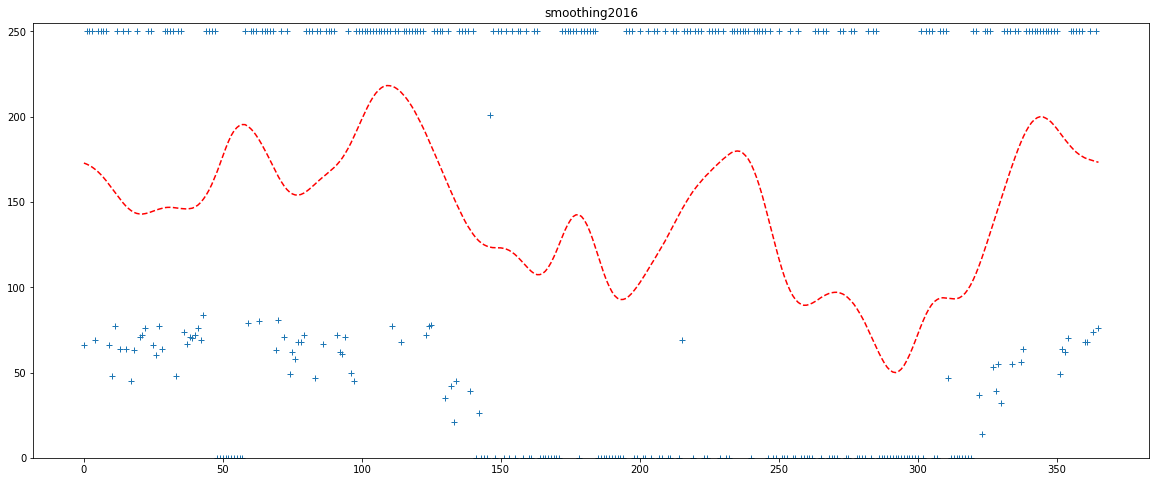

In [76]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

# find where the weight is highest, and lets look there!
product='MOD10A1'
sweight = weights_array.sum(axis=2)

r,c = np.where(sweight == np.max(sweight))
plt.figure(figsize=(20,8))
plt.title('smoothing2016')
ipixel = 0 # To plot the i-th pixel
plt.plot((interpolated_lai)[r[ipixel],c[ipixel],:],'r--')
plt.plot((lai_array)[r[ipixel],c[ipixel],:],'+')
plt.ylim(0,255)

In [113]:
#to do the time series of 2017

from datetime import datetime, timedelta

def process_timeseries(year,
                       tiles,
                       folder,
                       shpfile,
                       verbose=True):

    today = datetime(year, 1, 1)
    dates = []
    for i in range(365):
        if (i%1 == 0) and verbose:
            print(f"Doing {str(today):s}")
        if today.year != year:
            break
        doy = int(today.strftime("%j"))
        
        #skip missing data
        if (doy==114) and (today.year == 2017):
            today=today+timedelta(days=1)
            continue
            
        this_lai, this_weight = process_single_date(
            tiles,
            doy,
            year,
            folder=folder,
            shpfile=shpfile,
            format="MEM")
        if doy == 1:
            # First day, create outputs!
            ny, nx = this_lai.shape
            lai_array2 = np.zeros((ny, nx, 365))
            weights_array2 = np.zeros((ny, nx, 365))
        lai_array2[:, :, i] = this_lai
        weights_array2[:, :, i] = this_weight
        dates.append(today)
        today = today + timedelta(days=1)
        
    return dates, lai_array2, weights_array2


tiles = 'h09v05'

year = 2017

dates, lai_array2, weights_array2 = process_timeseries(
    year,
    tiles,
    folder="data/",
    shpfile="data/Hydrologic_Units/HUC_Polygons.shp")



Doing 2017-01-01 00:00:00
Doing 2017-01-02 00:00:00
Doing 2017-01-03 00:00:00
Doing 2017-01-04 00:00:00
Doing 2017-01-05 00:00:00
Doing 2017-01-06 00:00:00
Doing 2017-01-07 00:00:00
Doing 2017-01-08 00:00:00
Doing 2017-01-09 00:00:00
Doing 2017-01-10 00:00:00
Doing 2017-01-11 00:00:00
Doing 2017-01-12 00:00:00
Doing 2017-01-13 00:00:00
Doing 2017-01-14 00:00:00
Doing 2017-01-15 00:00:00
Doing 2017-01-16 00:00:00
Doing 2017-01-17 00:00:00
Doing 2017-01-18 00:00:00
Doing 2017-01-19 00:00:00
Doing 2017-01-20 00:00:00
Doing 2017-01-21 00:00:00
Doing 2017-01-22 00:00:00
Doing 2017-01-23 00:00:00
Doing 2017-01-24 00:00:00
Doing 2017-01-25 00:00:00
Doing 2017-01-26 00:00:00
Doing 2017-01-27 00:00:00
Doing 2017-01-28 00:00:00
Doing 2017-01-29 00:00:00
Doing 2017-01-30 00:00:00
Doing 2017-01-31 00:00:00
Doing 2017-02-01 00:00:00
Doing 2017-02-02 00:00:00
Doing 2017-02-03 00:00:00
Doing 2017-02-04 00:00:00
Doing 2017-02-05 00:00:00
Doing 2017-02-06 00:00:00
Doing 2017-02-07 00:00:00
Doing 2017-0

Doing 2017-11-13 00:00:00
Doing 2017-11-14 00:00:00
Doing 2017-11-15 00:00:00
Doing 2017-11-16 00:00:00
Doing 2017-11-17 00:00:00
Doing 2017-11-18 00:00:00
Doing 2017-11-19 00:00:00
Doing 2017-11-20 00:00:00
Doing 2017-11-21 00:00:00
Doing 2017-11-22 00:00:00
Doing 2017-11-23 00:00:00
Doing 2017-11-24 00:00:00
Doing 2017-11-25 00:00:00
Doing 2017-11-26 00:00:00
Doing 2017-11-27 00:00:00
Doing 2017-11-28 00:00:00
Doing 2017-11-29 00:00:00
Doing 2017-11-30 00:00:00
Doing 2017-12-01 00:00:00
Doing 2017-12-02 00:00:00
Doing 2017-12-03 00:00:00
Doing 2017-12-04 00:00:00
Doing 2017-12-05 00:00:00
Doing 2017-12-06 00:00:00
Doing 2017-12-07 00:00:00
Doing 2017-12-08 00:00:00
Doing 2017-12-09 00:00:00
Doing 2017-12-10 00:00:00
Doing 2017-12-11 00:00:00
Doing 2017-12-12 00:00:00
Doing 2017-12-13 00:00:00
Doing 2017-12-14 00:00:00
Doing 2017-12-15 00:00:00
Doing 2017-12-16 00:00:00
Doing 2017-12-17 00:00:00
Doing 2017-12-18 00:00:00
Doing 2017-12-19 00:00:00
Doing 2017-12-20 00:00:00
Doing 2017-1

In [114]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

sigma = 8
import scipy
import scipy.ndimage.filters

x = np.arange(-3*sigma,3*sigma+1)
gaussian = np.exp((-(x/sigma)**2)/2.0)

dates, lai_array2, weights_array2 = process_timeseries( year, tiles, folder="data/",
                                                     shpfile="data/Hydrologic_Units/HUC_Polygons.shp")
print(lai_array2.shape, weights_array2.shape) #Check the output array shapes

numerator = scipy.ndimage.filters.convolve1d(lai_array2 * weights_array2, gaussian, axis=2,mode='wrap')
denominator = scipy.ndimage.filters.convolve1d(weights_array2, gaussian, axis=2,mode='wrap')

# avoid divide by 0 problems by setting zero values
# of the denominator to not a number (NaN)
denominator[denominator==0] = np.nan

interpolated_lai = numerator/denominator
print(interpolated_lai.shape)

Doing 2017-01-01 00:00:00
Doing 2017-01-02 00:00:00
Doing 2017-01-03 00:00:00
Doing 2017-01-04 00:00:00
Doing 2017-01-05 00:00:00
Doing 2017-01-06 00:00:00
Doing 2017-01-07 00:00:00
Doing 2017-01-08 00:00:00
Doing 2017-01-09 00:00:00
Doing 2017-01-10 00:00:00
Doing 2017-01-11 00:00:00
Doing 2017-01-12 00:00:00
Doing 2017-01-13 00:00:00
Doing 2017-01-14 00:00:00
Doing 2017-01-15 00:00:00
Doing 2017-01-16 00:00:00
Doing 2017-01-17 00:00:00
Doing 2017-01-18 00:00:00
Doing 2017-01-19 00:00:00
Doing 2017-01-20 00:00:00
Doing 2017-01-21 00:00:00
Doing 2017-01-22 00:00:00
Doing 2017-01-23 00:00:00
Doing 2017-01-24 00:00:00
Doing 2017-01-25 00:00:00
Doing 2017-01-26 00:00:00
Doing 2017-01-27 00:00:00
Doing 2017-01-28 00:00:00
Doing 2017-01-29 00:00:00
Doing 2017-01-30 00:00:00
Doing 2017-01-31 00:00:00
Doing 2017-02-01 00:00:00
Doing 2017-02-02 00:00:00
Doing 2017-02-03 00:00:00
Doing 2017-02-04 00:00:00
Doing 2017-02-05 00:00:00
Doing 2017-02-06 00:00:00
Doing 2017-02-07 00:00:00
Doing 2017-0

Doing 2017-11-16 00:00:00
Doing 2017-11-17 00:00:00
Doing 2017-11-18 00:00:00
Doing 2017-11-19 00:00:00
Doing 2017-11-20 00:00:00
Doing 2017-11-21 00:00:00
Doing 2017-11-22 00:00:00
Doing 2017-11-23 00:00:00
Doing 2017-11-24 00:00:00
Doing 2017-11-25 00:00:00
Doing 2017-11-26 00:00:00
Doing 2017-11-27 00:00:00
Doing 2017-11-28 00:00:00
Doing 2017-11-29 00:00:00
Doing 2017-11-30 00:00:00
Doing 2017-12-01 00:00:00
Doing 2017-12-02 00:00:00
Doing 2017-12-03 00:00:00
Doing 2017-12-04 00:00:00
Doing 2017-12-05 00:00:00
Doing 2017-12-06 00:00:00
Doing 2017-12-07 00:00:00
Doing 2017-12-08 00:00:00
Doing 2017-12-09 00:00:00
Doing 2017-12-10 00:00:00
Doing 2017-12-11 00:00:00
Doing 2017-12-12 00:00:00
Doing 2017-12-13 00:00:00
Doing 2017-12-14 00:00:00
Doing 2017-12-15 00:00:00
Doing 2017-12-16 00:00:00
Doing 2017-12-17 00:00:00
Doing 2017-12-18 00:00:00
Doing 2017-12-19 00:00:00
Doing 2017-12-20 00:00:00
Doing 2017-12-21 00:00:00
Doing 2017-12-22 00:00:00
Doing 2017-12-23 00:00:00
Doing 2017-1

(0, 255)

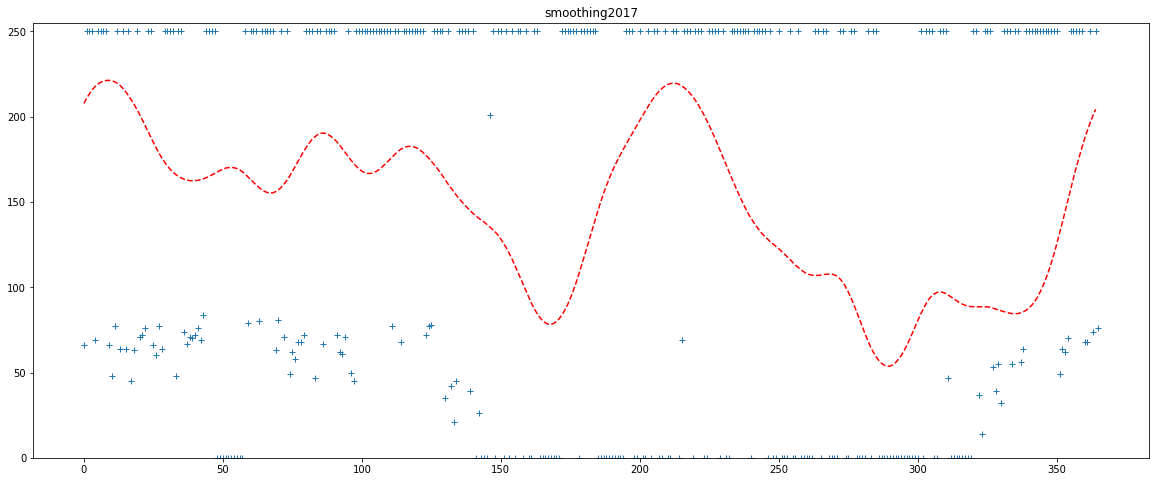

In [115]:
"""
This code developed in the model 
"Chapter 3.4"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the cleaning more efficient.
"""

# find where the weight is highest, and lets look there!
product='MOD10A1'
sweight = weights_array.sum(axis=2)

r,c = np.where(sweight == np.max(sweight))
plt.figure(figsize=(20,8))
plt.title('smoothing2017')
ipixel = 0 # To plot the i-th pixel
plt.plot((interpolated_lai)[r[ipixel],c[ipixel],:],'r--')
plt.plot((lai_array)[r[ipixel],c[ipixel],:],'+')
plt.ylim(0,255)

In [130]:
#interpolation 3D array
#mask the time series of 2016
#lai_array, weights_array
print(lai_array1.shape)
print(lai_array2.shape)
lai_array1[lai_array1>100]=np.nan
x,y,t=np.where(~np.isnan(lai_array1))
mask=np.isnan(lai_array1).sum(axis=2)>=366
bad_x,bad_y=np.where(mask)

grid_x,grid_y,grid_z=np.mgrid[0:134,0:243,0:366]

import scipy
from scipy.interpolate import griddata
interpolated_lai_array1=scipy.interpolate.griddata((x,y,t),lai_array1[x,y,t],(grid_x,grid_y,grid_z),method='nearest')

#np.save('data/interpolation(snow2016).npy',interpolated_lai_array1)

#interpolation 3D array
#mask the time series of 2017
#lai_array, weights_array

lai_array2[lai_array2>100]=np.nan
x,y,t=np.where(~np.isnan(lai_array2))
mask=np.isnan(lai_array2).sum(axis=2)>=365
bad_x,bad_y=np.where(mask)

grid_x,grid_y,grid_z=np.mgrid[0:134,0:243,0:366]

import scipy
from scipy.interpolate import griddata
interpolated_lai_array2=scipy.interpolate.griddata((x,y,t),lai_array2[x,y,t],(grid_x,grid_y,grid_z),method='nearest')

#np.save('data/interpolation(snow2016).npy',interpolated_lai_array1)



(134, 243, 366)
(134, 243, 365)


/opt/anaconda/envs/geog0111/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/opt/anaconda/envs/geog0111/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


In [129]:
#interpolation
#the weights of snow cover should be less than 1
#mask the time series of 2016
#lai_array, weights_array
print(weights_array1.shape)
print(weights_array2.shape)
weights_array1[weights_array1>1]=np.nan
x,y,t=np.where(~np.isnan(weights_array1))
mask=np.isnan(weights_array1).sum(axis=2)>=366
bad_x,bad_y=np.where(mask)

grid_x,grid_y,grid_z=np.mgrid[0:134,0:243,0:366]

import scipy
from scipy.interpolate import griddata
interpolated_weights_array1=scipy.interpolate.griddata((x,y,t),weights_array1[x,y,t],
                                                       (grid_x,grid_y,grid_z),method='nearest')

np.save('data/interpolation(snow2016_weights).npy',interpolated_weights_array1)


#interpolation
#the weights of snow cover should be less than 1
#mask the time series of 2017
#lai_array, weights_array


weights_array2[weights_array2>1]=np.nan
x,y,t=np.where(~np.isnan(weights_array2))
mask=np.isnan(weights_array2).sum(axis=2)>=366
bad_x,bad_y=np.where(mask)

grid_x,grid_y,grid_z=np.mgrid[0:134,0:243,0:366]

import scipy
from scipy.interpolate import griddata
interpolated_weights_array2=scipy.interpolate.griddata((x,y,t),weights_array2[x,y,t],
                                                       (grid_x,grid_y,grid_z),method='nearest')

np.save('data/interpolation(snow2016_weights).npy',interpolated_weights_array2)

(134, 243, 366)
(134, 243, 365)
